In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

In [3]:
train_df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954


In [4]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


### Remove Contractions

In [5]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_df['no_contract']=train_df['message'].apply(lambda x:expand_contractions(x))
test_df['no_contract']=test_df['message'].apply(lambda x:expand_contractions(x))

In [6]:
train_df.head()

,sentiment,message,tweetid,no_contract
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"RT @SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading i..."


In [7]:
test_df.head()

,message,tweetid,no_contract
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change...
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #..."
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican


### Remove Retweets and Hyperlinks

In [8]:
def clean_tweets(no_contract):
    #Remove old style retweet text "RT"
    no_contract = re.sub(r'^RT[\s]','', no_contract)
    
    #Remove hyperlinks
    no_contract = re.sub(r'https?:\/\/.*[\r\n]*','',  no_contract)
    return no_contract
train_df['no_contract'] = train_df['no_contract'].map(lambda x: clean_tweets(x))
test_df['no_contract'] = test_df['no_contract'].map(lambda x: clean_tweets(x))
train_df.head()

,sentiment,message,tweetid,no_contract
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t..."


In [9]:
test_df.head()

,message,tweetid,no_contract
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican


### Remove noise

In [10]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df['no_contract'] = train_df['no_contract'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test_df['no_contract'] = test_df['no_contract'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [11]:
train_df.head()

,sentiment,message,tweetid,no_contract
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t..."


In [12]:
test_df.head()

,message,tweetid,no_contract
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican


### Tokenization

In [13]:
train_df['tokenized'] = train_df['no_contract'].apply(word_tokenize)
test_df['tokenized'] = test_df['no_contract'].apply(word_tokenize)
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,..."


In [14]:
test_df.head()

,message,tweetid,no_contract,tokenized
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti..."
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a..."
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]"


### Convert all characters to lowercase

In [15]:
train_df['lower'] = train_df['tokenized'].apply(lambda x: [word.lower() for word in x])
test_df['lower'] = test_df['tokenized'].apply(lambda x: [word.lower() for word in x])
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized,lower
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,..."


In [16]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti..."
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a..."
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]"


### Remove punctuations

In [17]:
punc = string.punctuation
train_df['no_punctuations'] = train_df['lower'].apply(lambda x: [word for word in x if word not in punc])
test_df['no_punctuations'] = test_df['lower'].apply(lambda x: [word for word in x if word not in punc])
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized,lower,no_punctuations
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[soynoviodetodas, it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, lea..."


In [18]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower,no_punctuations
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti..."
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and,..."
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, unimpeachable, evidence, that, climate, change, is, already, here]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d...","[karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, does, not, belie..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]"


### Remove stopwords

In [19]:
stop_words = set(stopwords.words('english'))
train_df['stopwords_removed'] = train_df['no_punctuations'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['stopwords_removed'] = test_df['no_punctuations'].apply(lambda x: [word for word in x if word not in stop_words])
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’...","[rawstory, researchers, say, three, years, act, climate, change, ’, late]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[soynoviodetodas, it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, lea...","[soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electio..."


In [20]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, looking, china, make, sure, alone, fighting, climate, change…]"
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and,...","[combine, polling, staffers, climate, change, womens, rights, fascist, state]"
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, unimpeachable, evidence, that, climate, change, is, already, here]","[scary, unimpeachable, evidence, climate, change, already]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d...","[karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, does, not, belie...","[karoli, morgfair, osborneink, dailykos, putin, got, jill, trump, believe, climate, change, thin..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]"


### Lemmatization

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')
train_df['pos_tags'] = train_df['stopwords_removed'].apply(nltk.tag.pos_tag)
test_df['pos_tags'] = test_df['stopwords_removed'].apply(nltk.tag.pos_tag)
train_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Montgomery\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,sentiment,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]","[(polyscimajor, JJ), (epa, NN), (chief, NN), (think, VBP), (carbon, NN), (dioxide, NN), (main, J..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]","[(like, IN), (lack, NN), (evidence, NN), (anthropogenic, JJ), (global, JJ), (warming, NN)]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’...","[rawstory, researchers, say, three, years, act, climate, change, ’, late]","[(rawstory, NN), (researchers, NNS), (say, VBP), (three, CD), (years, NNS), (act, JJ), (climate,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change]","[(todayinmaker, NN), (wired, VBD), (2016, CD), (pivotal, JJ), (year, NN), (war, NN), (climate, N..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[soynoviodetodas, it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, lea...","[soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electio...","[(soynoviodetodas, JJ), (2016, CD), (racist, NN), (sexist, NN), (climate, NN), (change, NN), (de..."


In [22]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, looking, china, make, sure, alone, fighting, climate, change…]","[(europe, NN), (looking, VBG), (china, NNS), (make, VBP), (sure, JJ), (alone, RB), (fighting, VB..."
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and,...","[combine, polling, staffers, climate, change, womens, rights, fascist, state]","[(combine, NN), (polling, VBG), (staffers, NNS), (climate, VBP), (change, NN), (womens, NNS), (r..."
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, unimpeachable, evidence, that, climate, change, is, already, here]","[scary, unimpeachable, evidence, climate, change, already]","[(scary, JJ), (unimpeachable, JJ), (evidence, NN), (climate, NN), (change, NN), (already, RB)]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d...","[karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, does, not, belie...","[karoli, morgfair, osborneink, dailykos, putin, got, jill, trump, believe, climate, change, thin...","[(karoli, NNS), (morgfair, NN), (osborneink, VBP), (dailykos, NN), (putin, NN), (got, VBD), (jil..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[(fakewillmoore, RB), ('female, JJ), (orgasms, NNS), (cause, VBP), (global, JJ), (warming, NN), ..."


In [23]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train_df['wordnet_pos'] = train_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
test_df['wordnet_pos'] = test_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags,wordnet_pos
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]","[(polyscimajor, JJ), (epa, NN), (chief, NN), (think, VBP), (carbon, NN), (dioxide, NN), (main, J...","[(polyscimajor, a), (epa, n), (chief, n), (think, v), (carbon, n), (dioxide, n), (main, a), (cau..."
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]","[(like, IN), (lack, NN), (evidence, NN), (anthropogenic, JJ), (global, JJ), (warming, NN)]","[(like, n), (lack, n), (evidence, n), (anthropogenic, a), (global, a), (warming, n)]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’...","[rawstory, researchers, say, three, years, act, climate, change, ’, late]","[(rawstory, NN), (researchers, NNS), (say, VBP), (three, CD), (years, NNS), (act, JJ), (climate,...","[(rawstory, n), (researchers, n), (say, v), (three, n), (years, n), (act, a), (climate, a), (cha..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change]","[(todayinmaker, NN), (wired, VBD), (2016, CD), (pivotal, JJ), (year, NN), (war, NN), (climate, N...","[(todayinmaker, n), (wired, v), (2016, n), (pivotal, a), (year, n), (war, n), (climate, n), (cha..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[soynoviodetodas, it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, lea...","[soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electio...","[(soynoviodetodas, JJ), (2016, CD), (racist, NN), (sexist, NN), (climate, NN), (change, NN), (de...","[(soynoviodetodas, a), (2016, n), (racist, n), (sexist, n), (climate, n), (change, n), (denying,..."


In [24]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags,wordnet_pos
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, looking, china, make, sure, alone, fighting, climate, change…]","[(europe, NN), (looking, VBG), (china, NNS), (make, VBP), (sure, JJ), (alone, RB), (fighting, VB...","[(europe, n), (looking, v), (china, n), (make, v), (sure, a), (alone, r), (fighting, v), (climat..."
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and,...","[combine, polling, staffers, climate, change, womens, rights, fascist, state]","[(combine, NN), (polling, VBG), (staffers, NNS), (climate, VBP), (change, NN), (womens, NNS), (r...","[(combine, n), (polling, v), (staffers, n), (climate, v), (change, n), (womens, n), (rights, n),..."
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, unimpeachable, evidence, that, climate, change, is, already, here]","[scary, unimpeachable, evidence, climate, change, already]","[(scary, JJ), (unimpeachable, JJ), (evidence, NN), (climate, NN), (change, NN), (already, RB)]","[(scary, a), (unimpeachable, a), (evidence, n), (climate, n), (change, n), (already, r)]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d...","[karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, does, not, belie...","[karoli, morgfair, osborneink, dailykos, putin, got, jill, trump, believe, climate, change, thin...","[(karoli, NNS), (morgfair, NN), (osborneink, VBP), (dailykos, NN), (putin, NN), (got, VBD), (jil...","[(karoli, n), (morgfair, n), (osborneink, v), (dailykos, n), (putin, n), (got, v), (jill, a), (t..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[(fakewillmoore, RB), ('female, JJ), (orgasms, NNS), (cause, VBP), (global, JJ), (warming, NN), ...","[(fakewillmoore, r), ('female, a), (orgasms, n), (cause, v), (global, a), (warming, n), (-sarcas..."


In [25]:
wnl = WordNetLemmatizer()
train_df['lemmatized'] = train_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
test_df['lemmatized'] = test_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train_df.head()

,sentiment,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, ...",625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait,...","[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warmi...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]","[(polyscimajor, JJ), (epa, NN), (chief, NN), (think, VBP), (carbon, NN), (dioxide, NN), (main, J...","[(polyscimajor, a), (epa, n), (chief, n), (think, v), (carbon, n), (dioxide, n), (main, a), (cau...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,It is not like we lack evidence of anthropogenic global warming,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[like, lack, evidence, anthropogenic, global, warming]","[(like, IN), (lack, NN), (evidence, NN), (anthropogenic, JJ), (global, JJ), (warming, NN)]","[(like, n), (lack, n), (evidence, n), (anthropogenic, a), (global, a), (warming, n)]","[like, lack, evidence, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late ...,698562,@RawStory: Researchers say we have three years to act on climate change before it’s too late,"[@, RawStory, :, Researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[@, rawstory, :, researchers, say, we, have, three, years, to, act, on, climate, change, before,...","[rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’...","[rawstory, researchers, say, three, years, act, climate, change, ’, late]","[(rawstory, NN), (researchers, NNS), (say, VBP), (three, CD), (years, NNS), (act, JJ), (climate,...","[(rawstory, n), (researchers, n), (say, v), (three, n), (years, n), (act, a), (climate, a), (cha...","[rawstory, researcher, say, three, year, act, climate, change, ’, late]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[#, todayinmaker, #, wired, :, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change]","[(todayinmaker, NN), (wired, VBD), (2016, CD), (pivotal, JJ), (year, NN), (war, NN), (climate, N...","[(todayinmaker, n), (wired, v), (2016, n), (pivotal, a), (year, n), (war, n), (climate, n), (cha...","[todayinmaker, wire, 2016, pivotal, year, war, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in...",466954,"@SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in t...","[@, SoyNovioDeTodas, :, It, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[@, soynoviodetodas, :, it, is, 2016, ,, and, a, racist, ,, sexist, ,, climate, change, denying,...","[soynoviodetodas, it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, lea...","[soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electio...","[(soynov

In [26]:
test_df.head()

,message,tweetid,no_contract,tokenized,lower,no_punctuations,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change...,169760,Europe will now be looking to China to make sure that it is not alone in fighting climate change…,"[Europe, will, now, be, looking, to, China, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighti...","[europe, looking, china, make, sure, alone, fighting, climate, change…]","[(europe, NN), (looking, VBG), (china, NNS), (make, VBP), (sure, JJ), (alone, RB), (fighting, VB...","[(europe, n), (looking, v), (china, n), (make, v), (sure, a), (alone, r), (fighting, v), (climat...","[europe, look, china, make, sure, alone, fight, climate, change…]"
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,35326,Combine this with the polling of staffers re climate change and womens' rights and you have a fa...,"[Combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, ', rights, a...","[combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and,...","[combine, polling, staffers, climate, change, womens, rights, fascist, state]","[(combine, NN), (polling, VBG), (staffers, NNS), (climate, VBP), (change, NN), (womens, NNS), (r...","[(combine, n), (polling, v), (staffers, n), (climate, v), (change, n), (womens, n), (rights, n),...","[combine, poll, staffer, climate, change, woman, right, fascist, state]"
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #...",224985,"The scary, unimpeachable evidence that climate change is already here:","[The, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, ,, unimpeachable, evidence, that, climate, change, is, already, here, :]","[the, scary, unimpeachable, evidence, that, climate, change, is, already, here]","[scary, unimpeachable, evidence, climate, change, already]","[(scary, JJ), (unimpeachable, JJ), (evidence, NN), (climate, NN), (change, NN), (already, RB)]","[(scary, a), (unimpeachable, a), (evidence, n), (climate, n), (change, n), (already, r)]","[scary, unimpeachable, evidence, climate, change, already]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in...,476263,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump does not believe i...,"[@, Karoli, @, morgfair, @, OsborneInk, @, dailykos, Putin, got, to, you, too, Jill, !, Trump, d...","[@, karoli, @, morgfair, @, osborneink, @, dailykos, putin, got, to, you, too, jill, !, trump, d...","[karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, does, not, belie...","[karoli, morgfair, osborneink, dailykos, putin, got, jill, trump, believe, climate, change, thin...","[(karoli, NNS), (morgfair, NN), (osborneink, VBP), (dailykos, NN), (putin, NN), (got, VBD), (jil...","[(karoli, n), (morgfair, n), (osborneink, v), (dailykos, n), (putin, n), (got, v), (jill, a), (t...","[karoli, morgfair, osborneink, dailykos, putin, get, jill, trump, believe, climate, change, thin..."
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,@FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,"[@, FakeWillMoore, :, 'Female, orgasms, cause, global, warming, !, ', -Sarcastic, Republican]","[@, fakewillmoore, :, 'female, orgasms, cause, global, warming, !, ', -sarcastic, republican]","[fakewillmoore, 'female, orgasms, cause, global, warming, -sarcastic, republican]","[fakewillmoore, 'female, orgasms, caus

In [27]:
test_df = test_df[['lemmatized']]
test_df.head()

,lemmatized
0,"[europe, look, china, make, sure, alone, fight, climate, change…]"
1,"[combine, poll, staffer, climate, change, woman, right, fascist, state]"
2,"[scary, unimpeachable, evidence, climate, change, already]"
3,"[karoli, morgfair, osborneink, dailykos, putin, get, jill, trump, believe, climate, change, thin..."
4,"[fakewillmoore, 'female, orgasm, cause, global, warming, -sarcastic, republican]"


In [28]:
#convert the list into a string
test_df['lemma'] = [' '.join(map(str,l)) for l in test_df['lemmatized']]
test_df.head()

,lemmatized,lemma
0,"[europe, look, china, make, sure, alone, fight, climate, change…]",europe look china make sure alone fight climate change…
1,"[combine, poll, staffer, climate, change, woman, right, fascist, state]",combine poll staffer climate change woman right fascist state
2,"[scary, unimpeachable, evidence, climate, change, already]",scary unimpeachable evidence climate change already
3,"[karoli, morgfair, osborneink, dailykos, putin, get, jill, trump, believe, climate, change, thin...",karoli morgfair osborneink dailykos putin get jill trump believe climate change think hoax
4,"[fakewillmoore, 'female, orgasm, cause, global, warming, -sarcastic, republican]",fakewillmoore 'female orgasm cause global warming -sarcastic republican


# Exploratory Data Analysis

In [29]:
from collections import Counter
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

In [30]:
import pyLDAvis.sklearn

In [31]:
train_df = train_df[['sentiment', 'lemmatized']]
train_df.head()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,lemmatized
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]"
1,1,"[like, lack, evidence, anthropogenic, global, warming]"
2,2,"[rawstory, researcher, say, three, year, act, climate, change, ’, late]"
3,1,"[todayinmaker, wire, 2016, pivotal, year, war, climate, change]"
4,1,"[soynoviodetodas, 2016, racist, sexist, climate, change, deny, bigot, lead, poll, electionnight]"


In [32]:
#convert the list into a string
train_df['lemma'] = [' '.join(map(str,l)) for l in train_df['lemmatized']]
train_df.head()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,lemmatized,lemma
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]",polyscimajor epa chief think carbon dioxide main cause global warming .. wait
1,1,"[like, lack, evidence, anthropogenic, global, warming]",like lack evidence anthropogenic global warming
2,2,"[rawstory, researcher, say, three, year, act, climate, change, ’, late]",rawstory researcher say three year act climate change ’ late
3,1,"[todayinmaker, wire, 2016, pivotal, year, war, climate, change]",todayinmaker wire 2016 pivotal year war climate change
4,1,"[soynoviodetodas, 2016, racist, sexist, climate, change, deny, bigot, lead, poll, electionnight]",soynoviodetodas 2016 racist sexist climate change deny bigot lead poll electionnight


C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


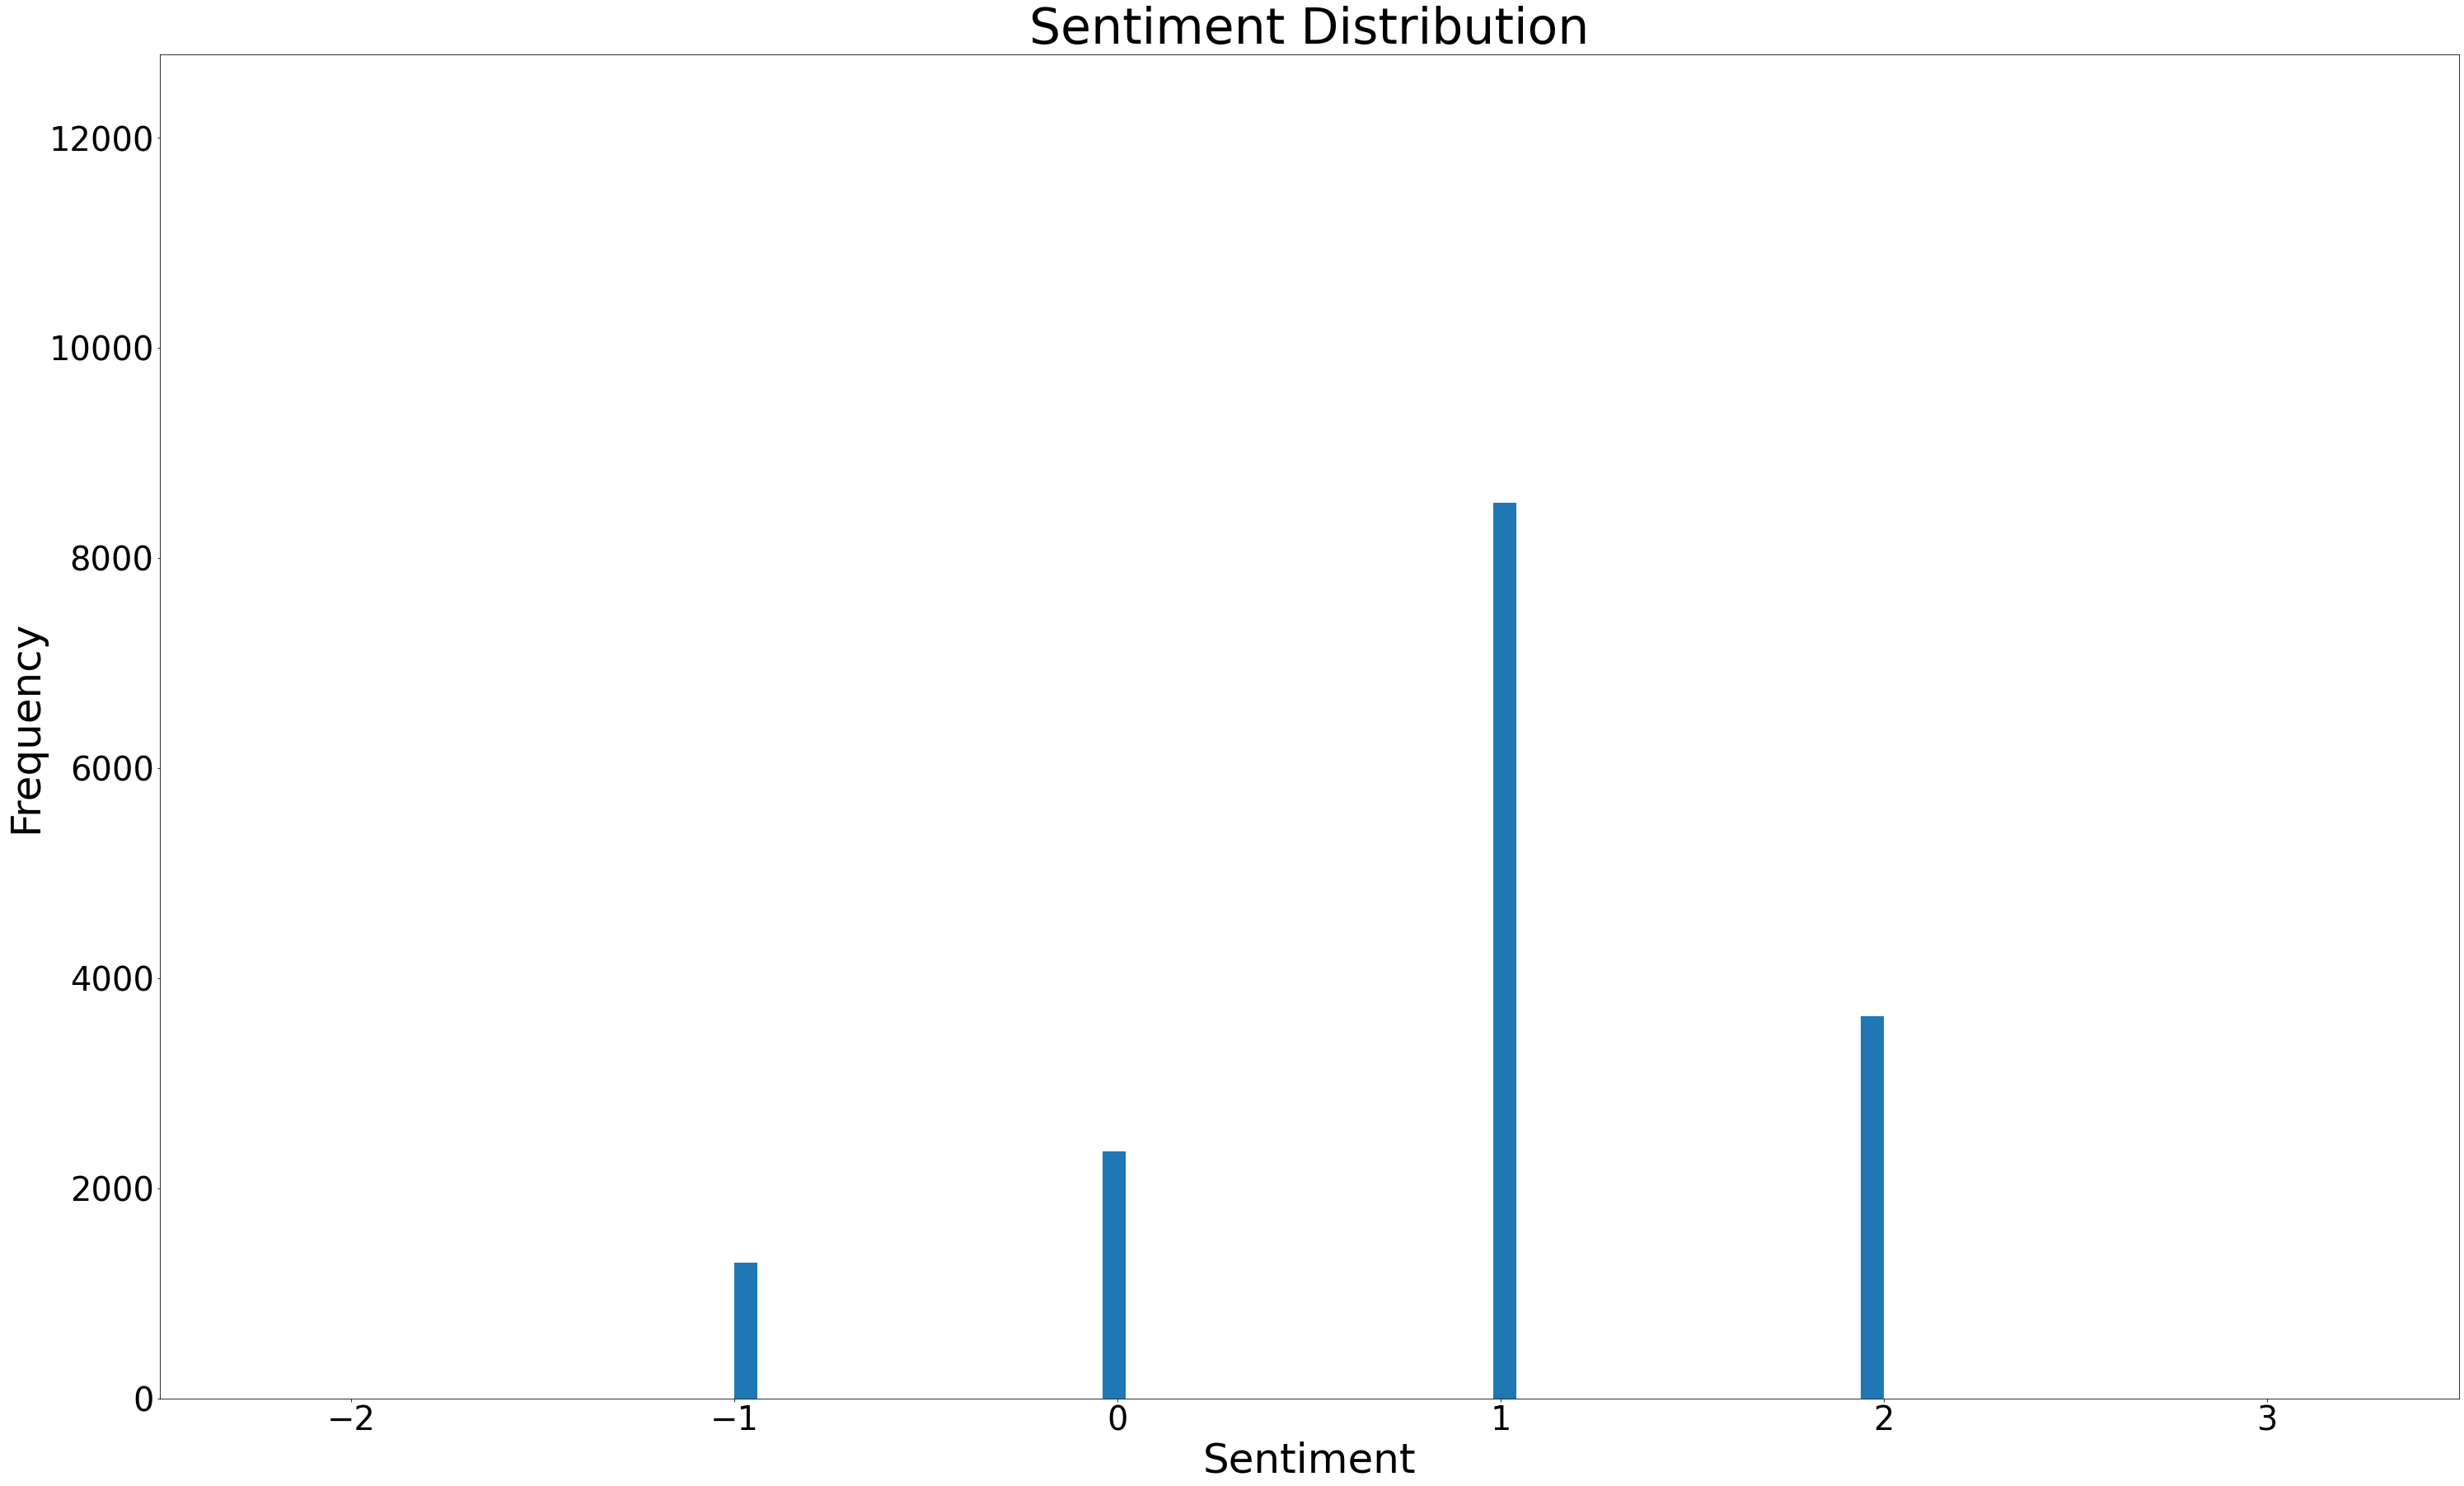

In [33]:
plt.figure(figsize=(50,30))
plt.margins(0.5)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(train_df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Montgomery\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, '-1'), Text(1, 0, '0'), Text(2, 0, '1'), Text(3, 0, '2')])

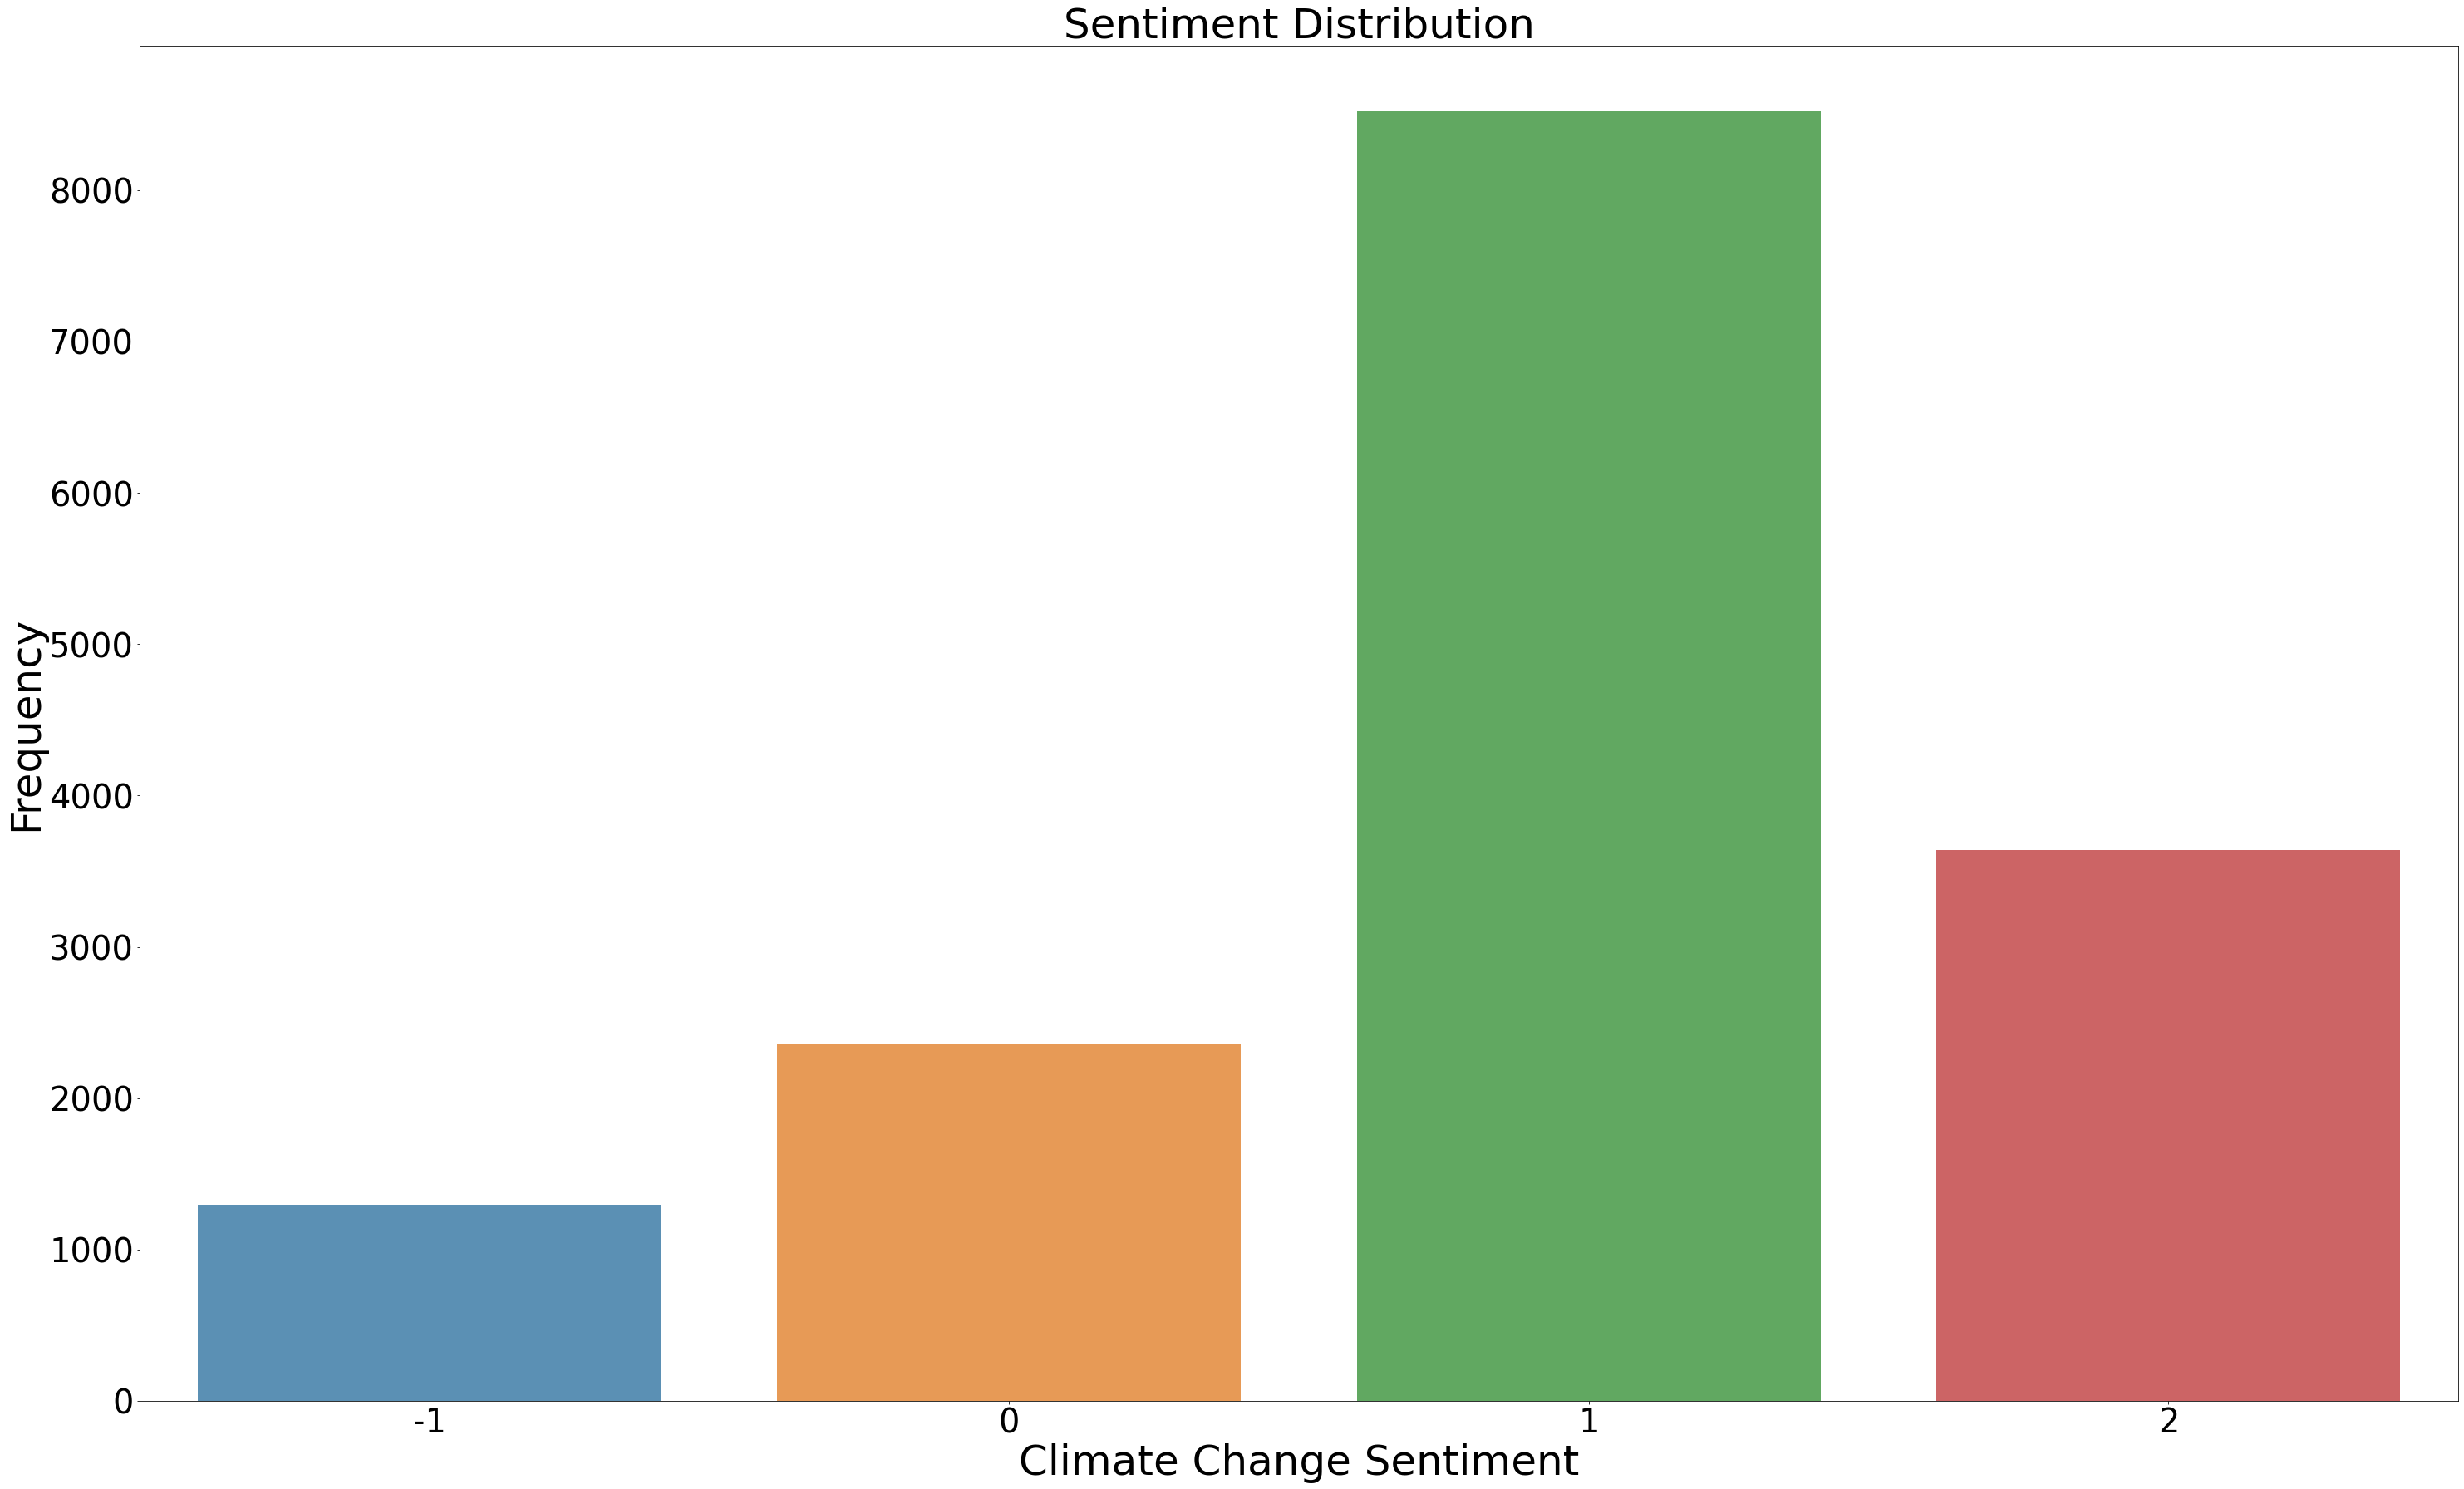

In [34]:
x_sentiment = train_df.sentiment.value_counts()
y_sentiment = x_sentiment.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_sentiment.index, x_sentiment.values, alpha=0.8)
plt.title("Sentiment Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Climate Change Sentiment', fontsize=50)
plt.xticks(fontsize=40)

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Percentage of Sentiments'}, ylabel='sentiment'>

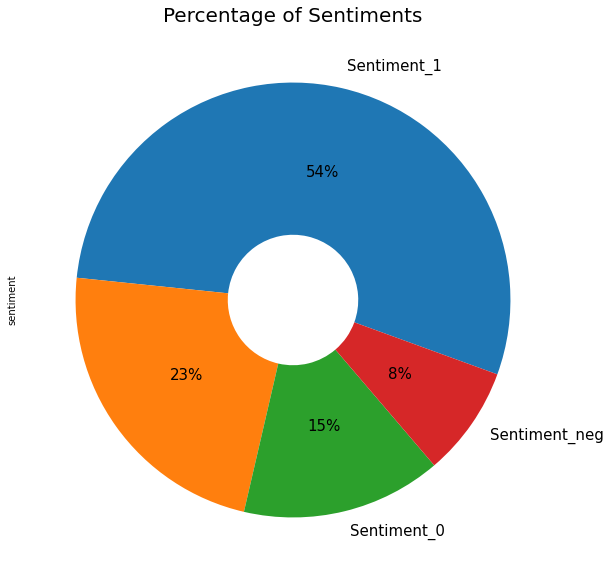

In [35]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Sentiments', fontsize=20)
train_df.sentiment.value_counts().plot(kind='pie', labels=['Sentiment_1', '', 'Sentiment_0', 'Sentiment_neg', 'Sentiment_2'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [36]:
train_df['word_count'] = train_df['lemmatized'].apply(lambda x: len(str(x).split()))
train_df['message_len'] = train_df['lemma'].astype(str).apply(len)
train_df.head()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,lemmatized,lemma,word_count,message_len
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, .., wait]",polyscimajor epa chief think carbon dioxide main cause global warming .. wait,12,77
1,1,"[like, lack, evidence, anthropogenic, global, warming]",like lack evidence anthropogenic global warming,6,47
2,2,"[rawstory, researcher, say, three, year, act, climate, change, ’, late]",rawstory researcher say three year act climate change ’ late,10,60
3,1,"[todayinmaker, wire, 2016, pivotal, year, war, climate, change]",todayinmaker wire 2016 pivotal year war climate change,8,54
4,1,"[soynoviodetodas, 2016, racist, sexist, climate, change, deny, bigot, lead, poll, electionnight]",soynoviodetodas 2016 racist sexist climate change deny bigot lead poll electionnight,11,84


C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


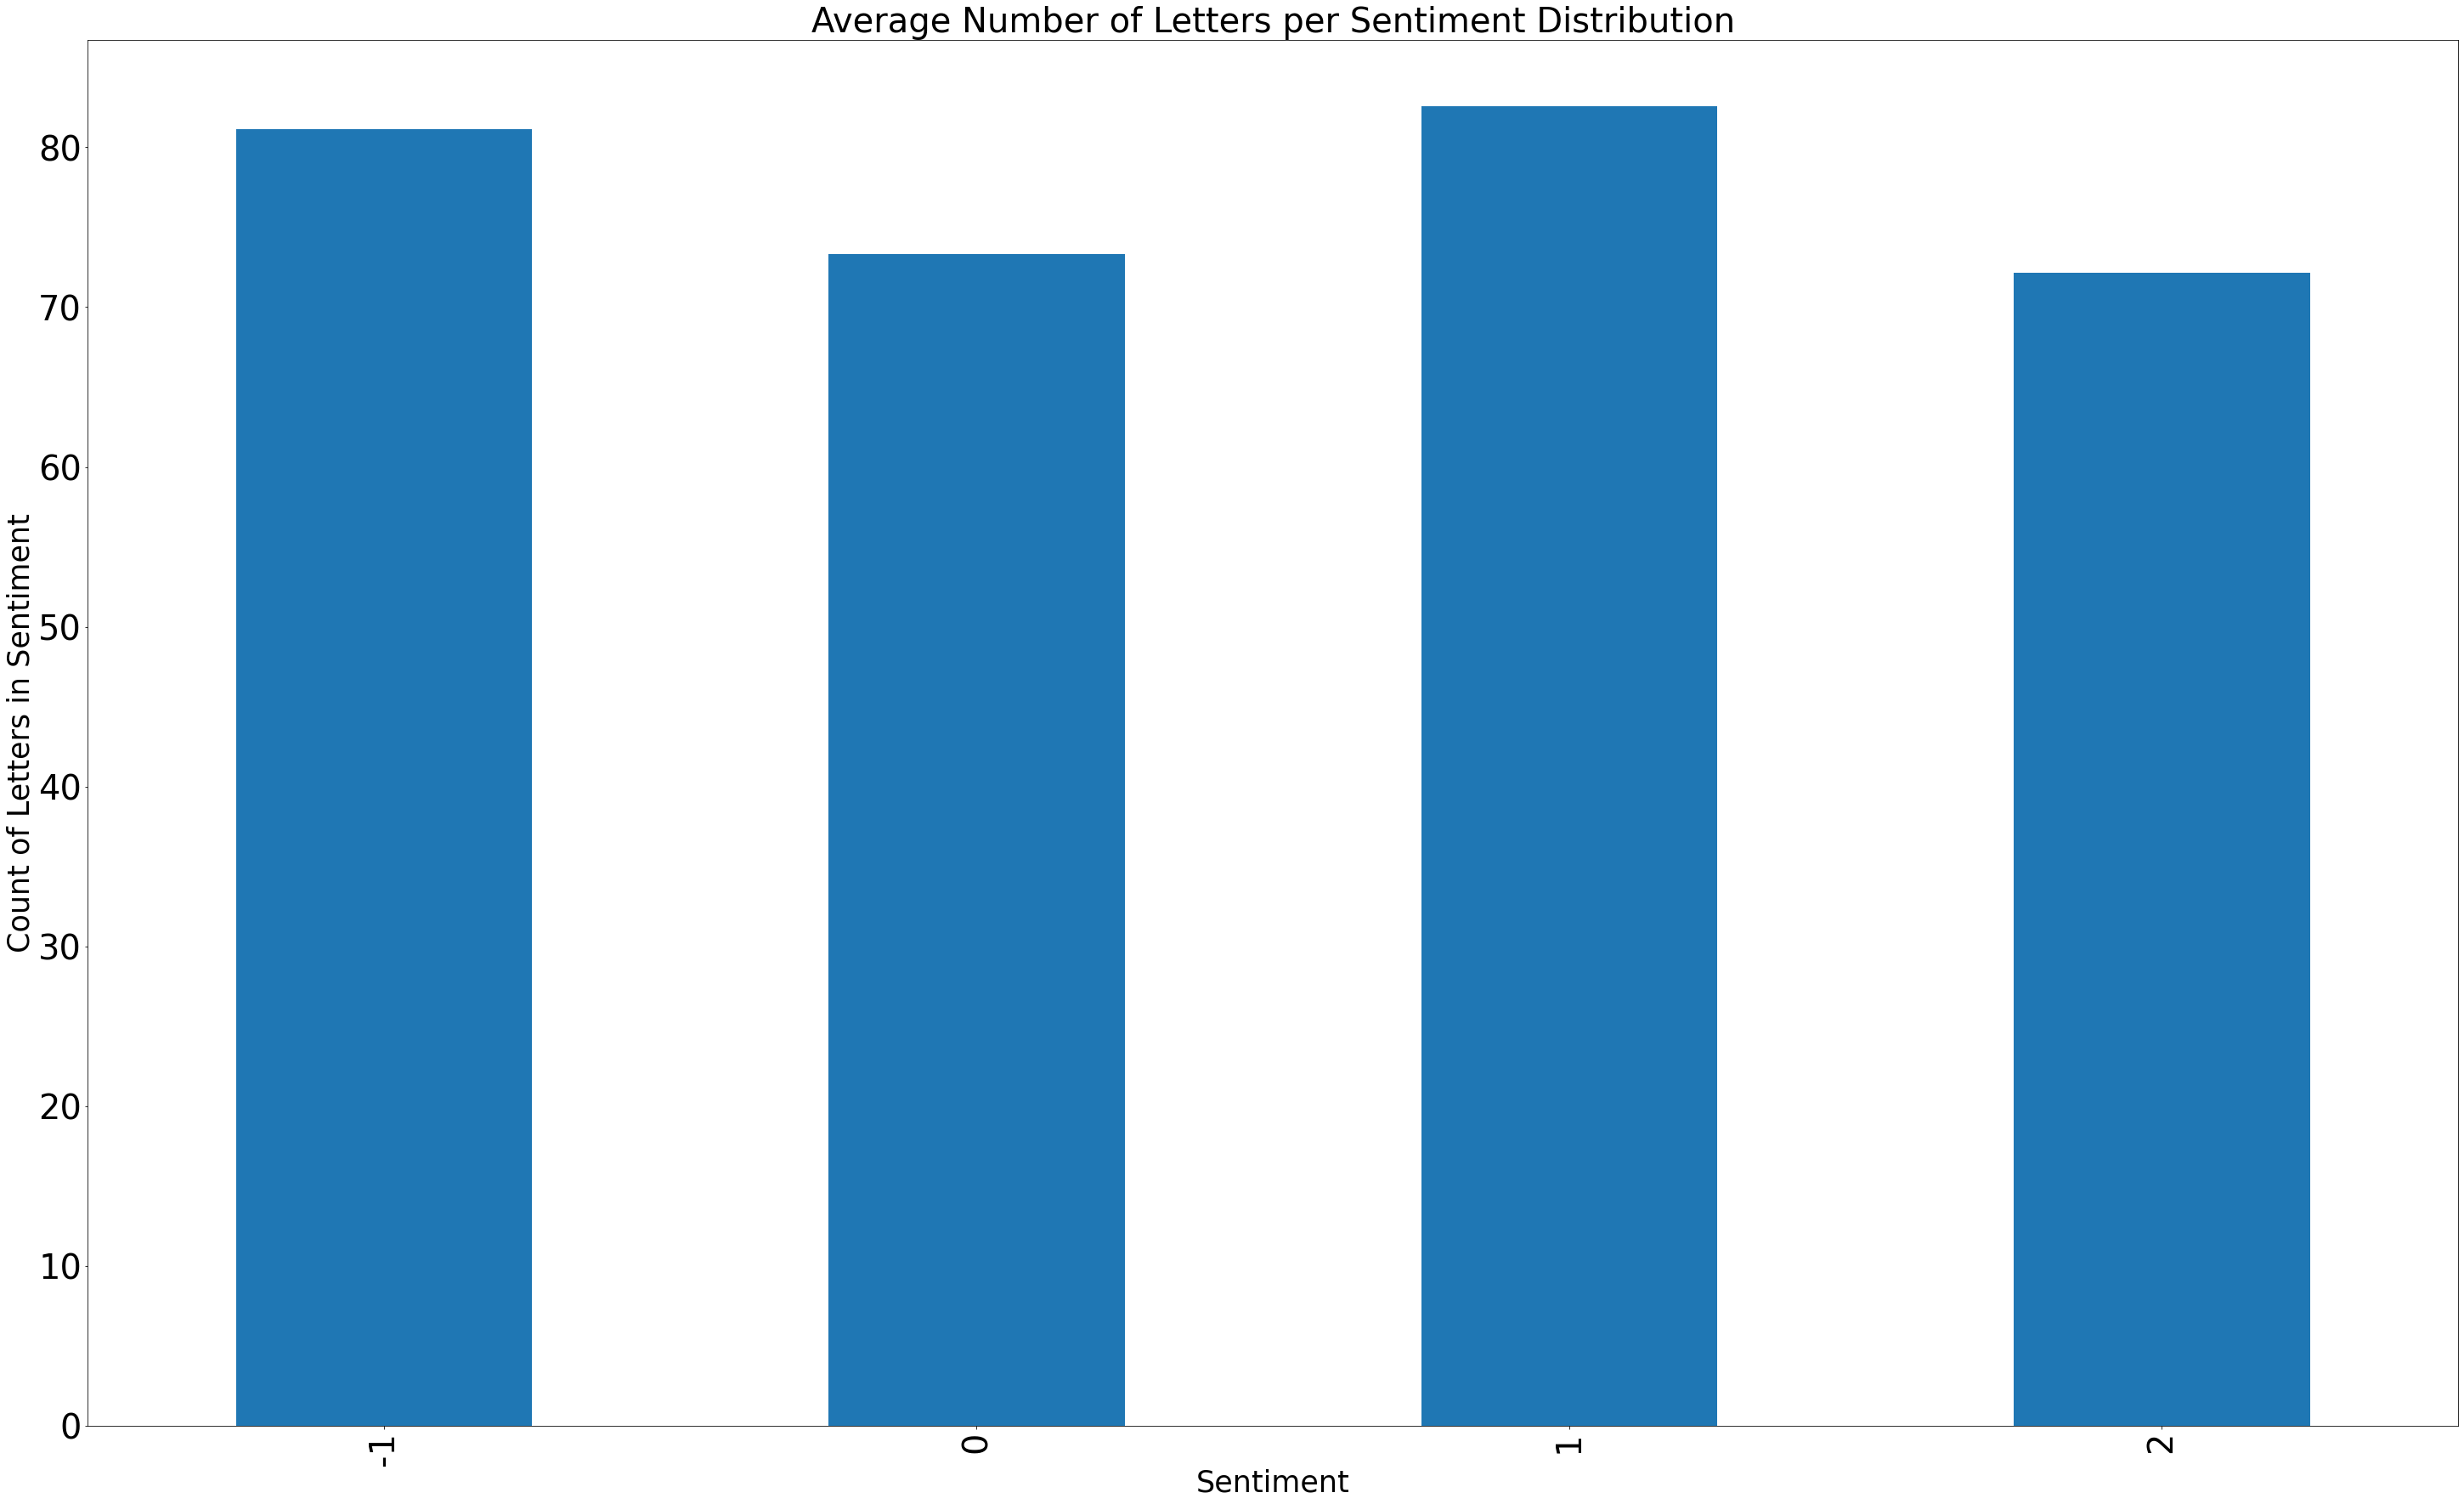

In [37]:
letter_avg = train_df.groupby('sentiment')['message_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Sentiment', fontsize=35)
plt.ylabel('Count of Letters in Sentiment', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Sentiment Distribution', fontsize=40)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


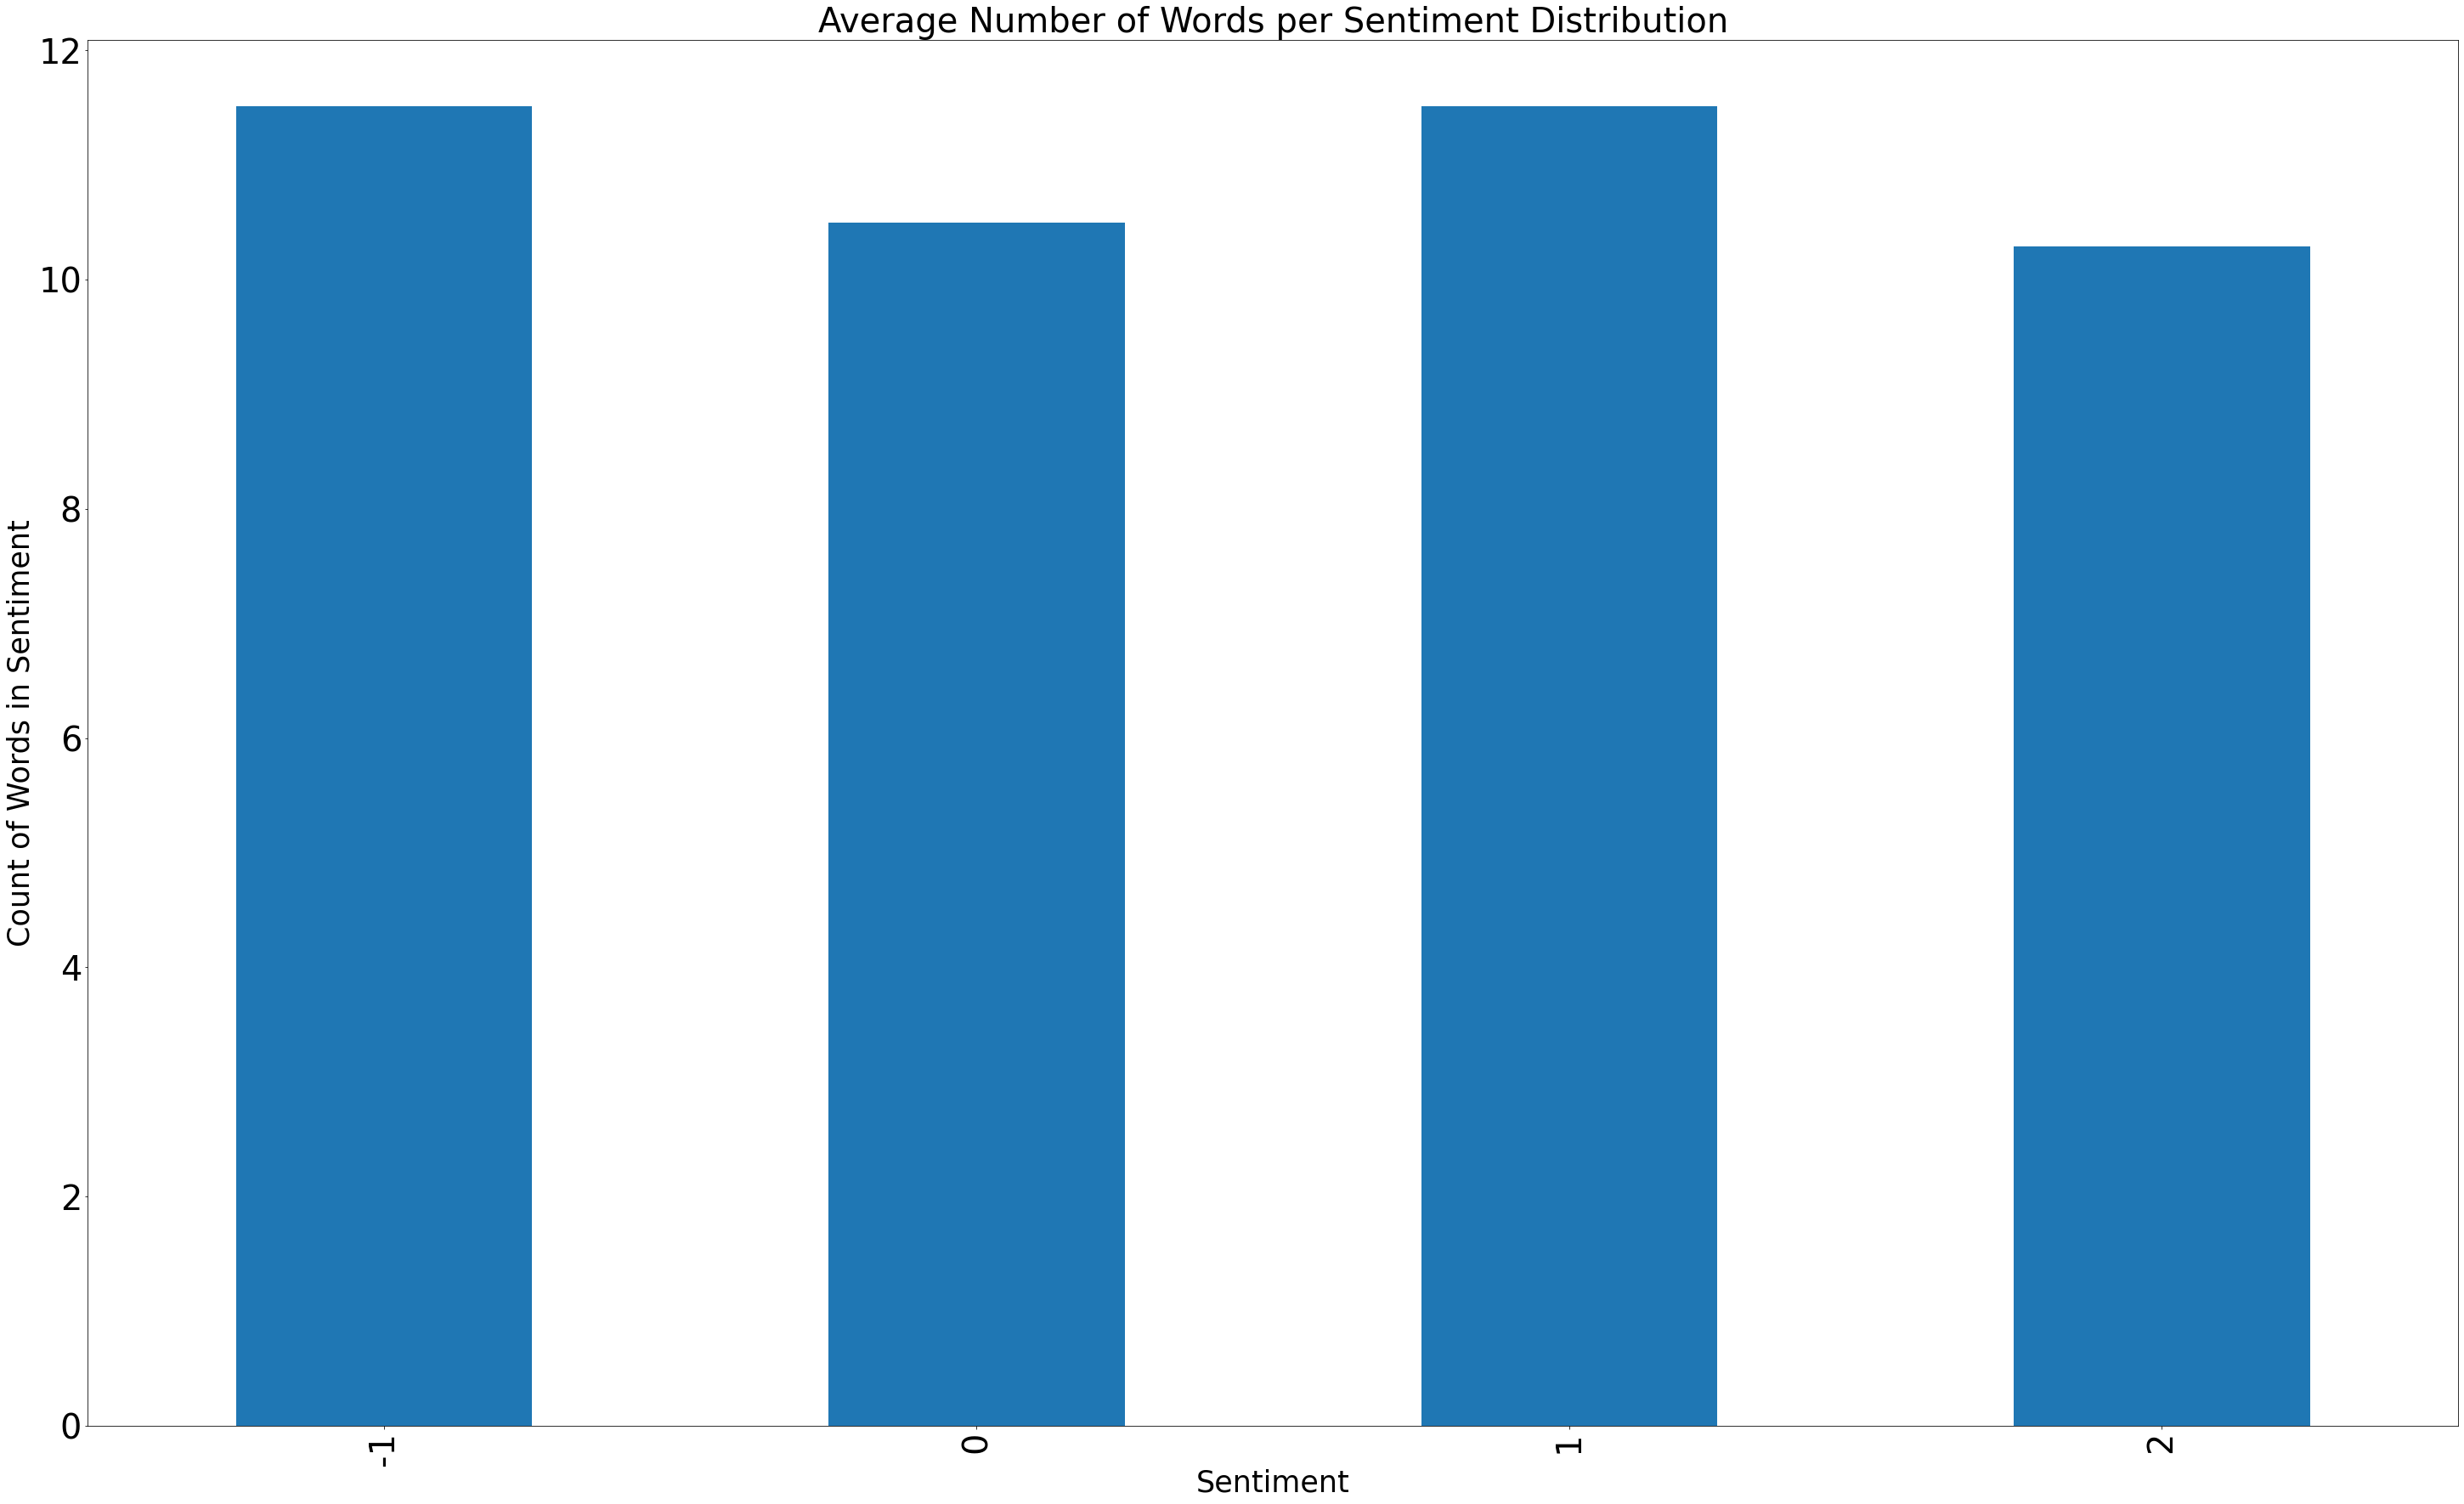

In [38]:
word_avg = train_df.groupby('sentiment')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Sentiment', fontsize=35)
plt.ylabel('Count of Words in Sentiment', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Sentiment Distribution', fontsize=40)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-82ec6fd9a4c1>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

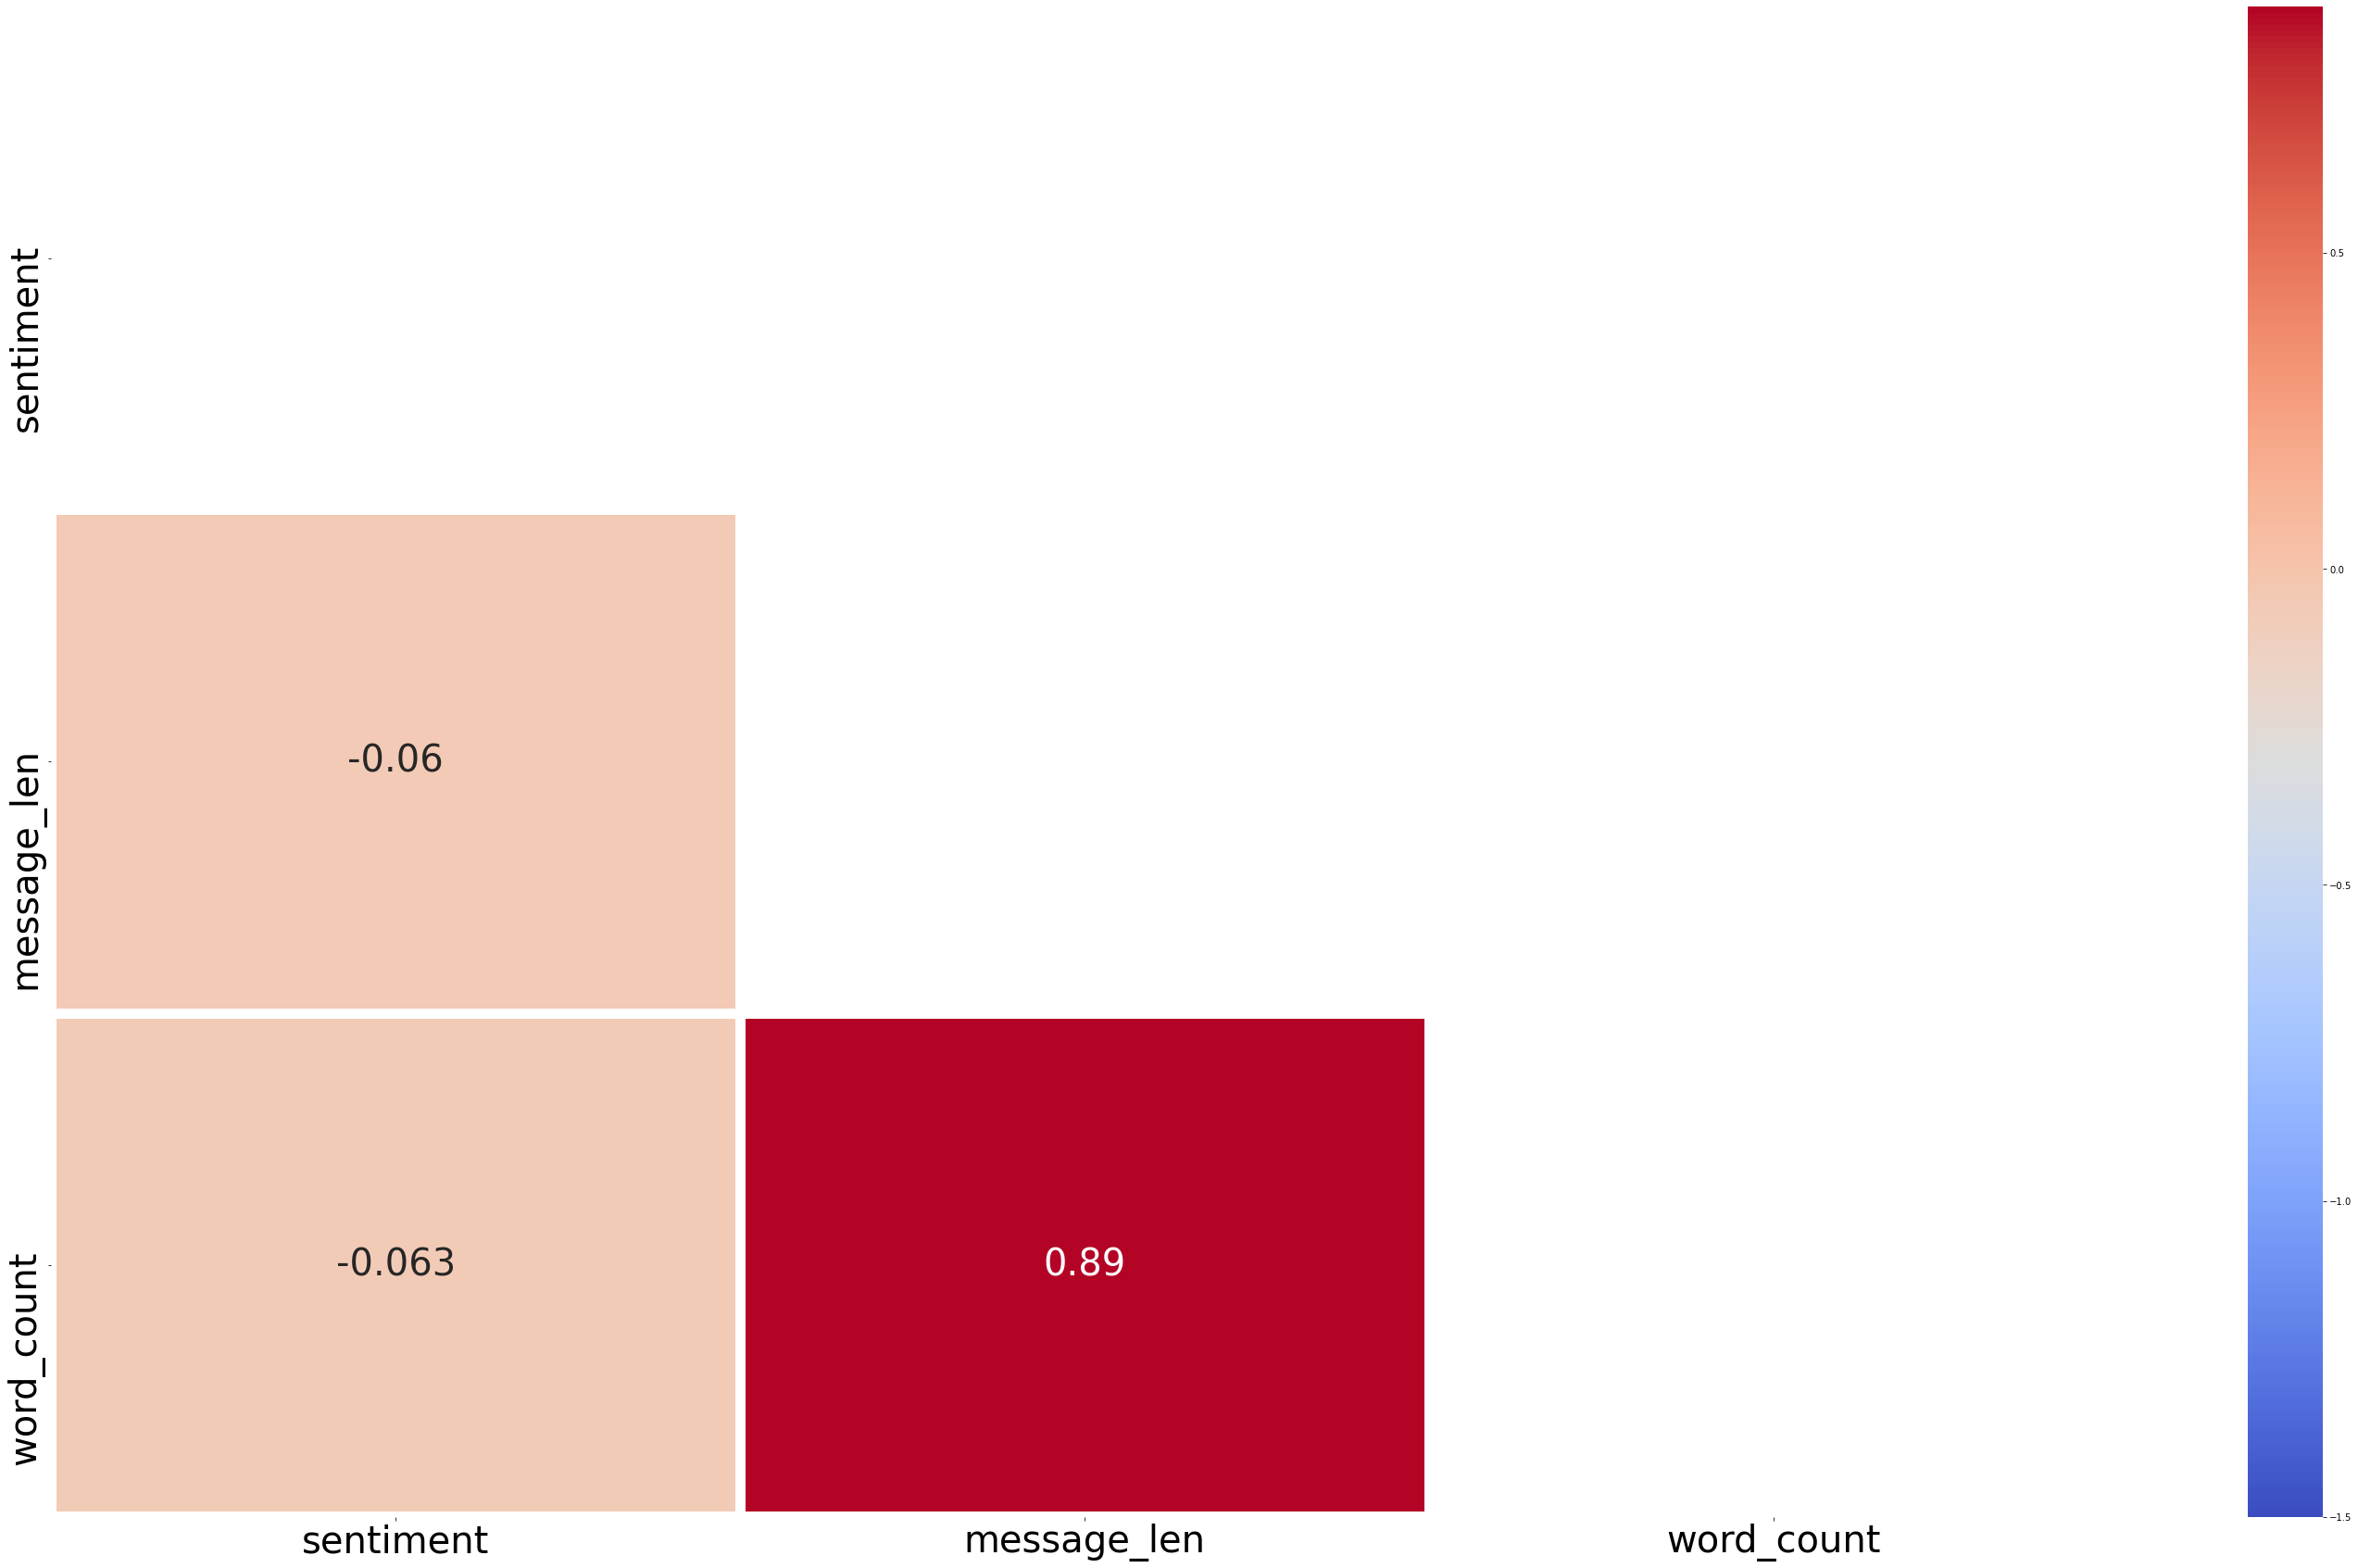

In [39]:
correlation = train_df[['sentiment', 'message_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

### Frequency analysis

In [40]:
words = train_df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['polyscimajor', 'epa', 'chief', 'think', 'carbon', 'dioxide', 'main', 'cause', 'global', 'warming', '..', 'wait', 'like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming', 'rawstory', 'researcher', 'say', 'three', 'year', 'act', 'climate', 'change', '’', 'late', 'todayinmaker', 'wire', '2016', 'pivotal', 'year', 'war', 'climate', 'change', 'soynoviodetodas', '2016', 'racist', 'sexist', 'climate', 'change', 'deny', 'bigot', 'lead', 'poll', 'electionnight', 'worth', 'read', 'whether', 'believe', 'climate', 'change', 'thenation', 'mike', 'penny', '’', 'believe', 'global', 'warm', 'smoking', 'cause', 'lung', 'cancer', 'makeandmendlife', 'six', 'big', 'thing', 'today', 'fight', 'climate', 'change', 'climate', 'activistã¢â‚¬â¦', 'aceofspadeshq', '8yo', 'nephew', 'inconsolable', 'want', 'die', 'old', 'age', 'like', 'perish', 'fiery', 'hellscape', 'climate', 'change', 'paigetweedy', 'offense…', 'like…', 'believe…', 'global', 'warming………', 'stephenschlegel', 'think', 'go', 'die', 'husb

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


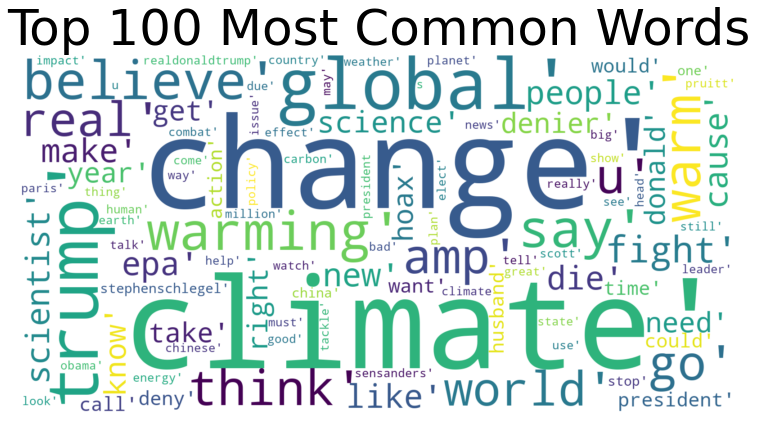

In [41]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Frequency of most common words

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


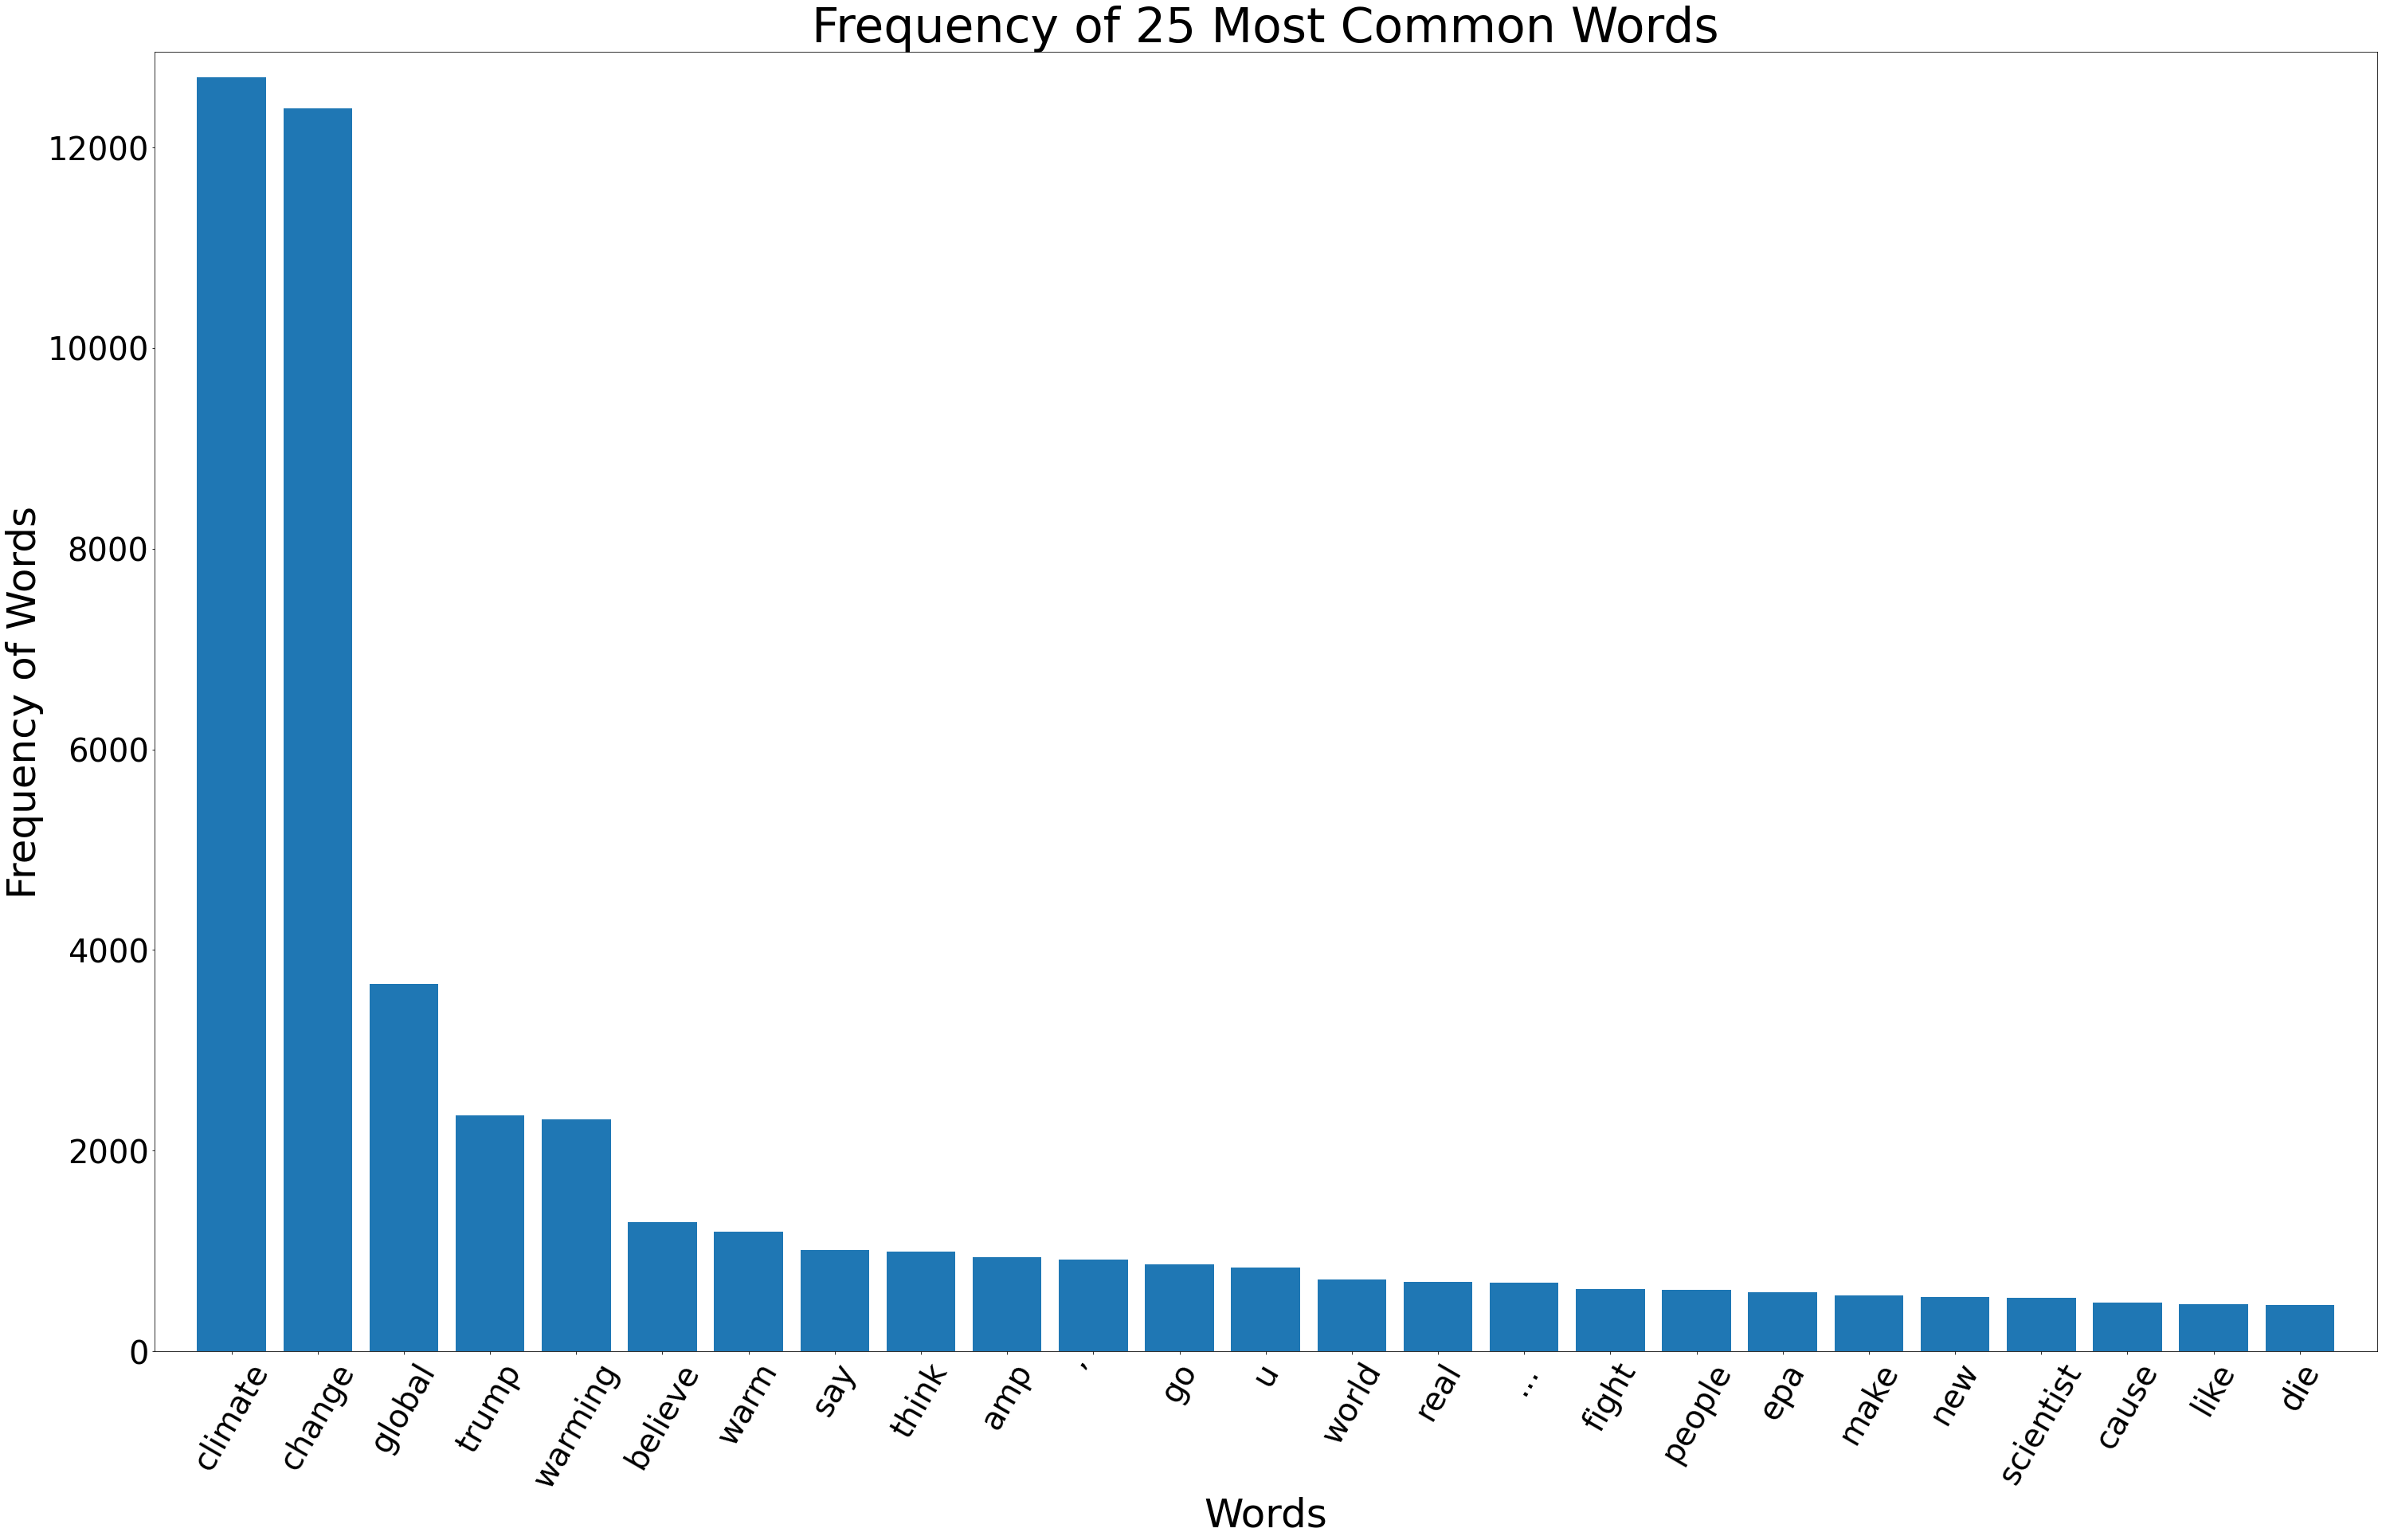

In [42]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


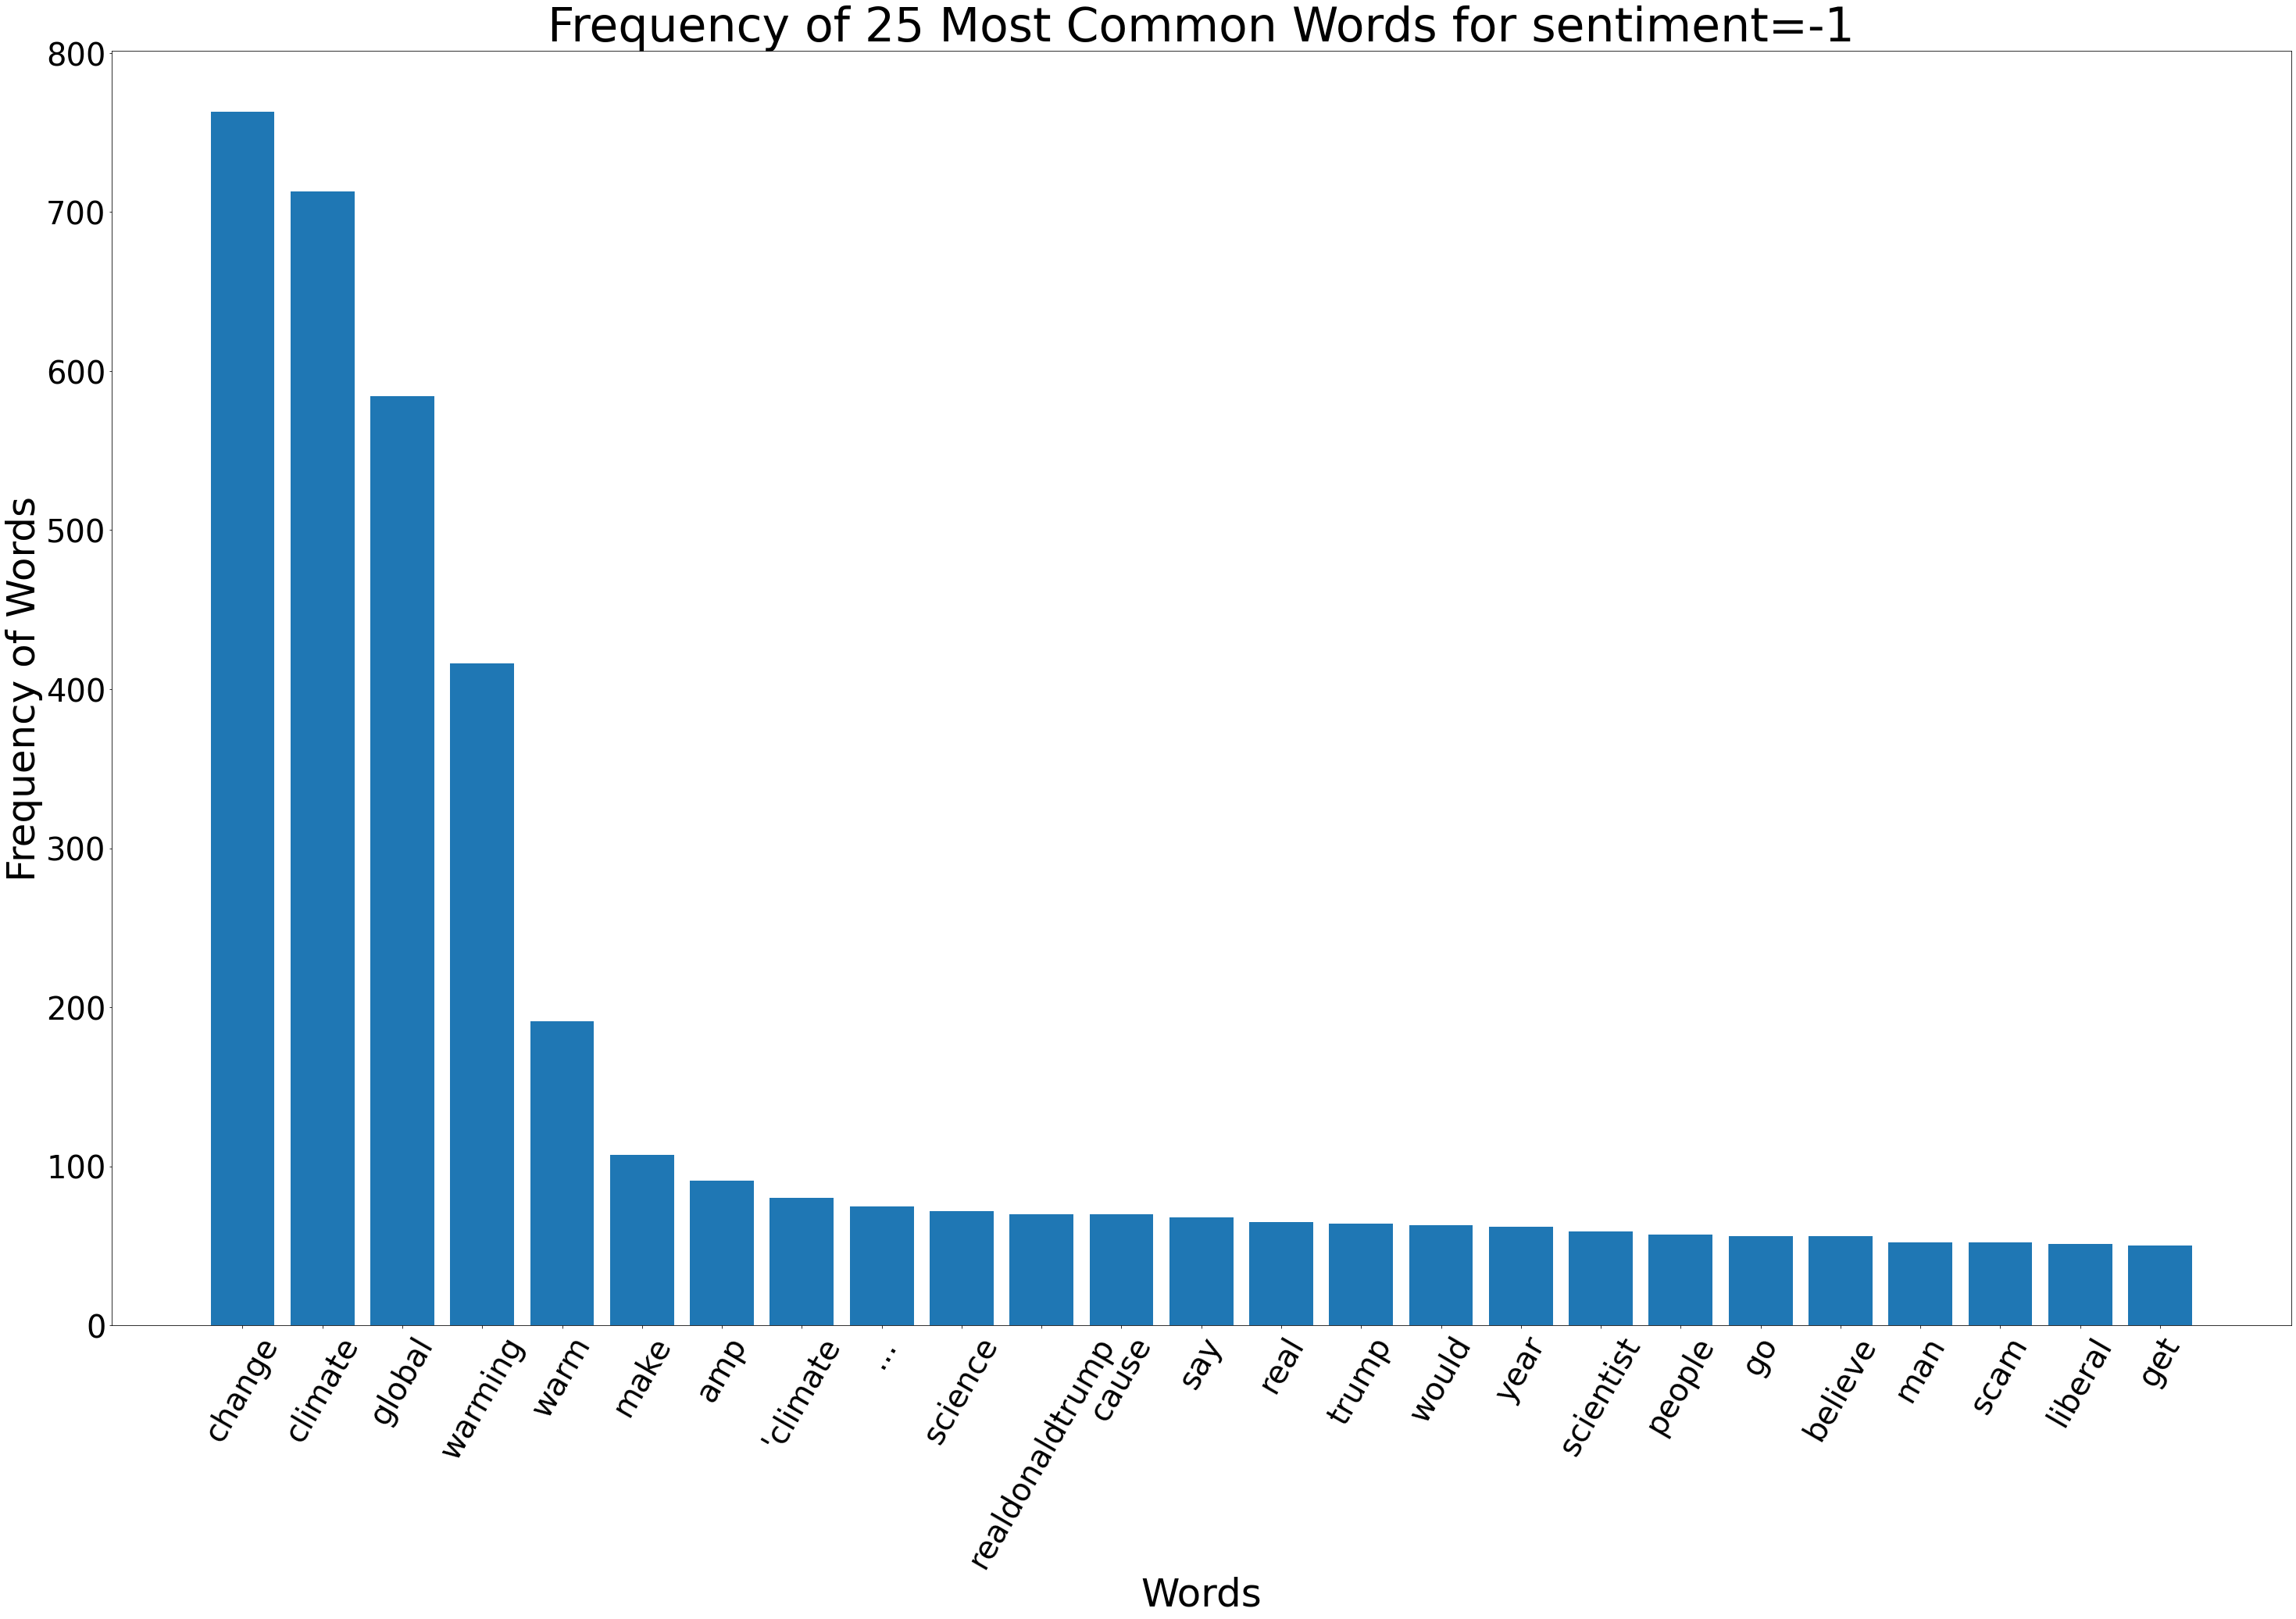

In [43]:
group_by = train_df.groupby('sentiment')['lemma'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for sentiment=-1', fontsize=60)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


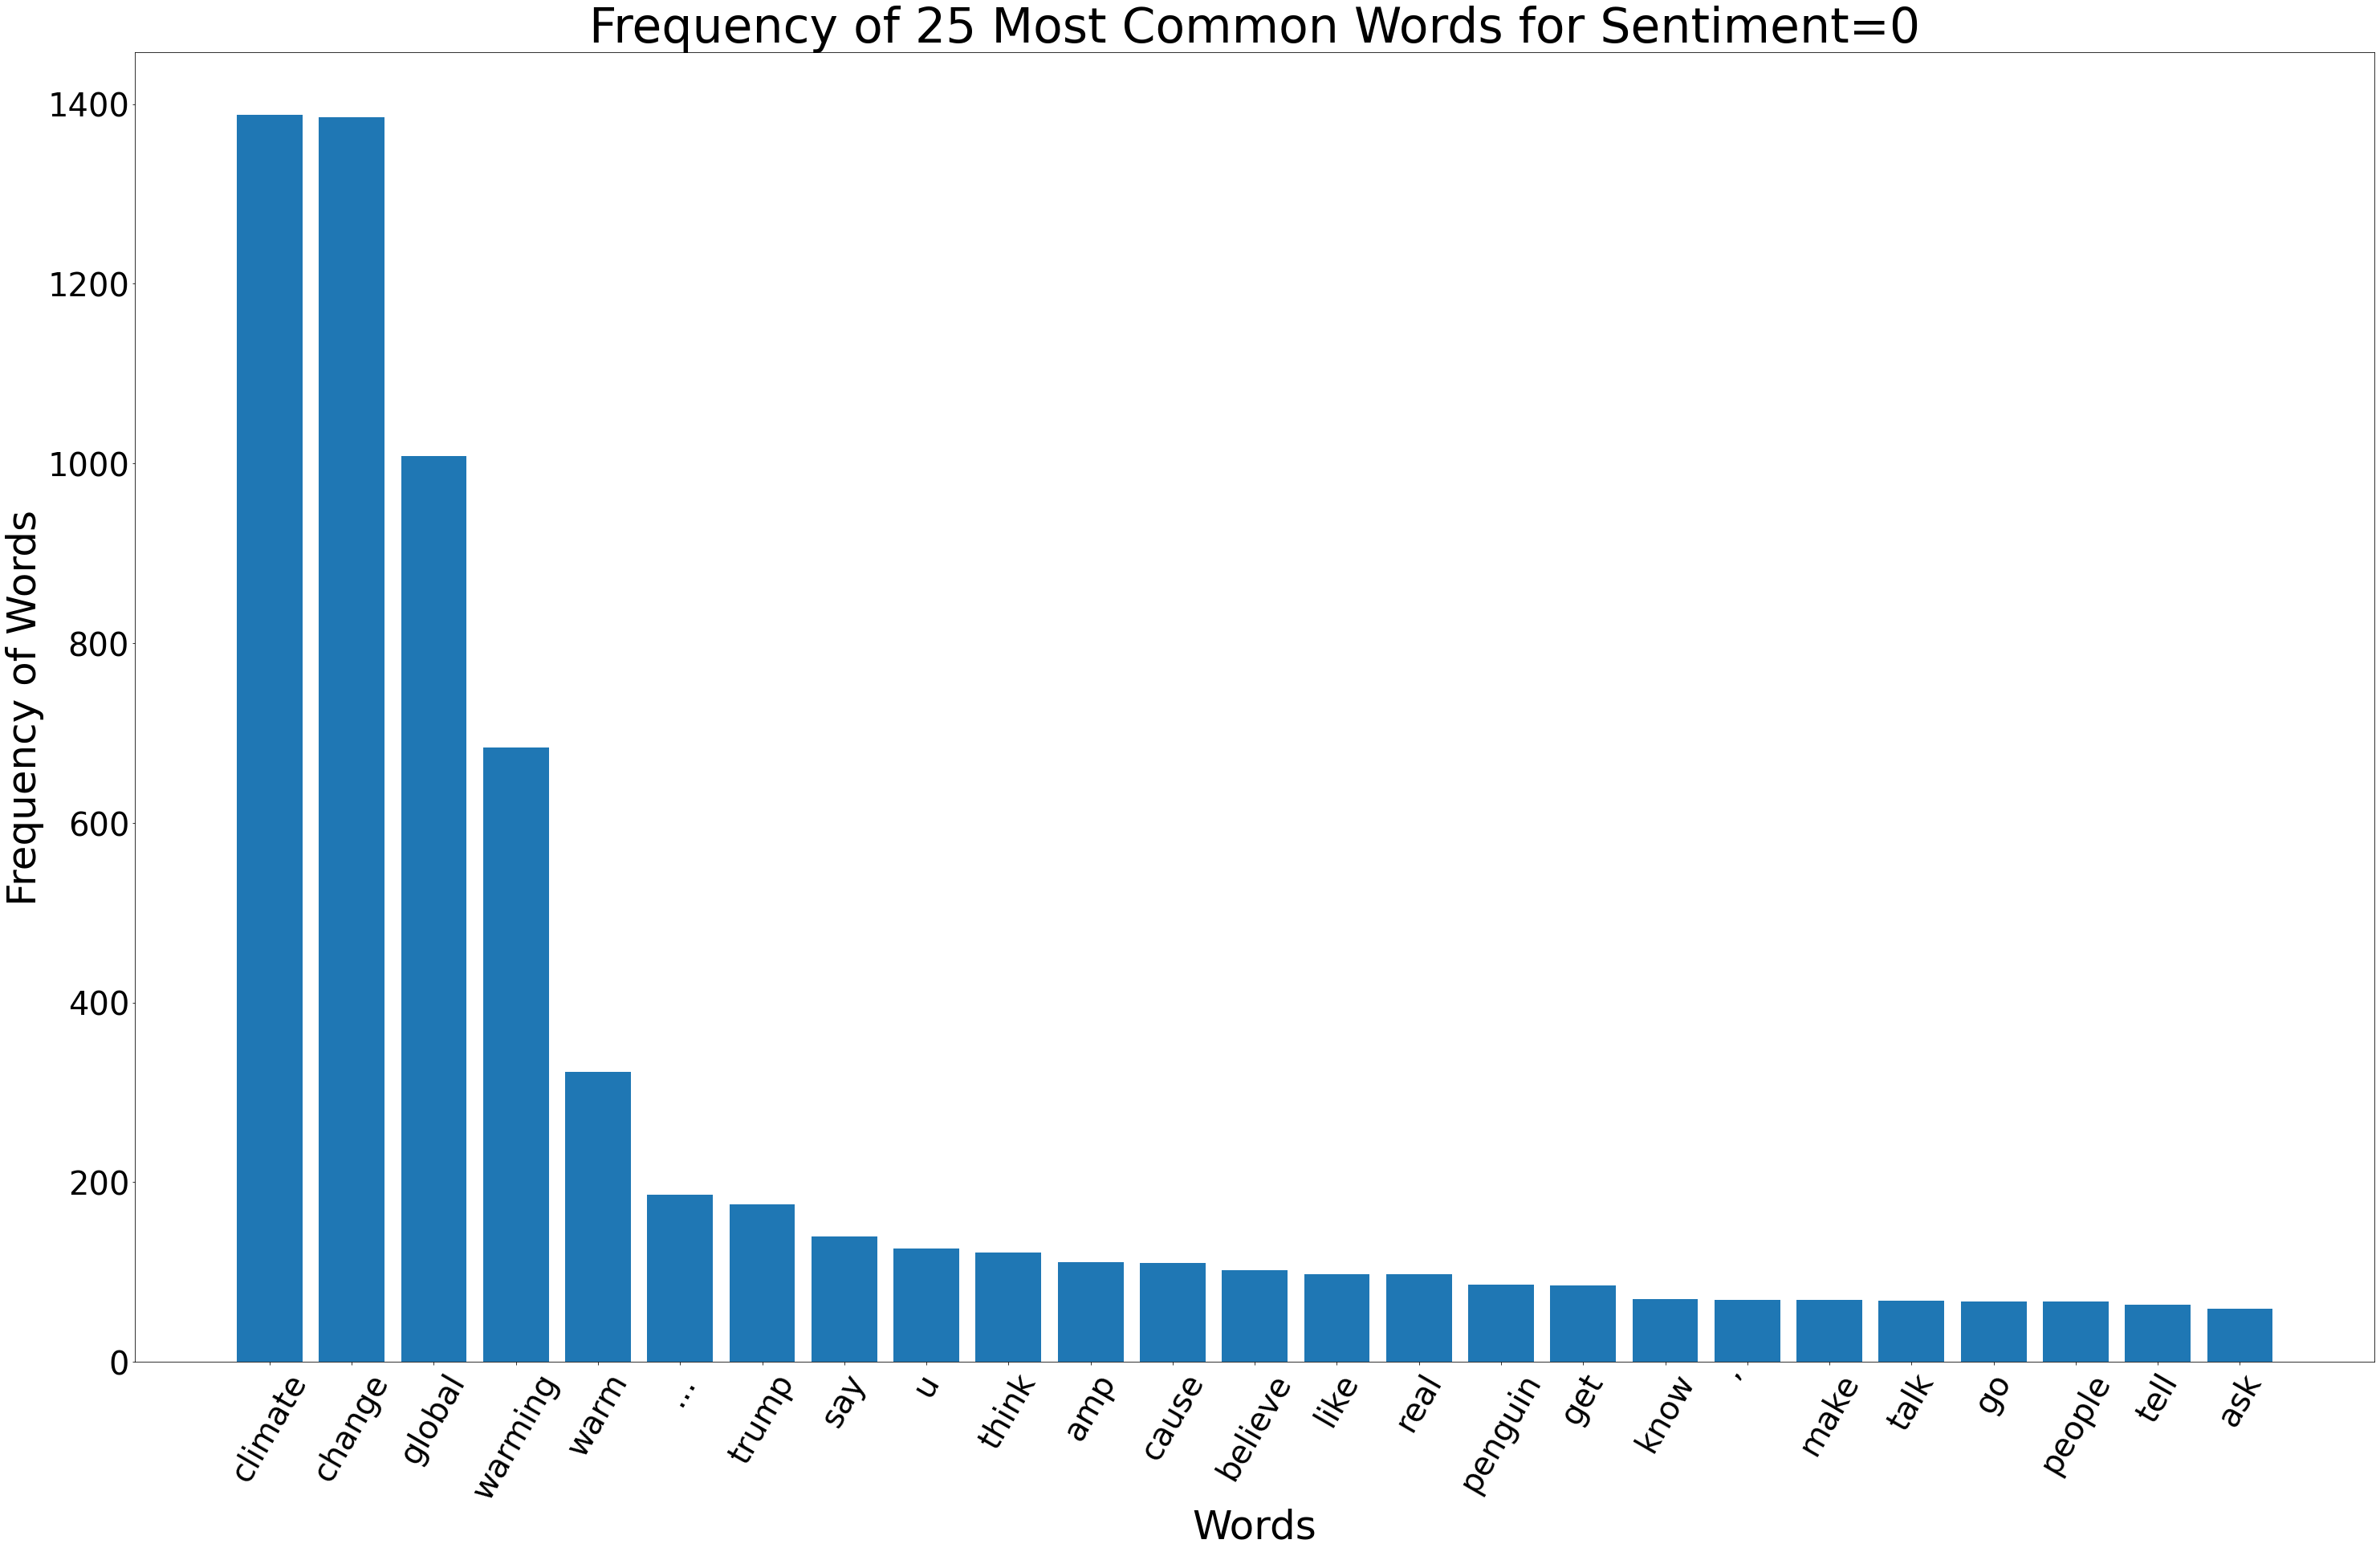

In [44]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Sentiment=0', fontsize=60)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


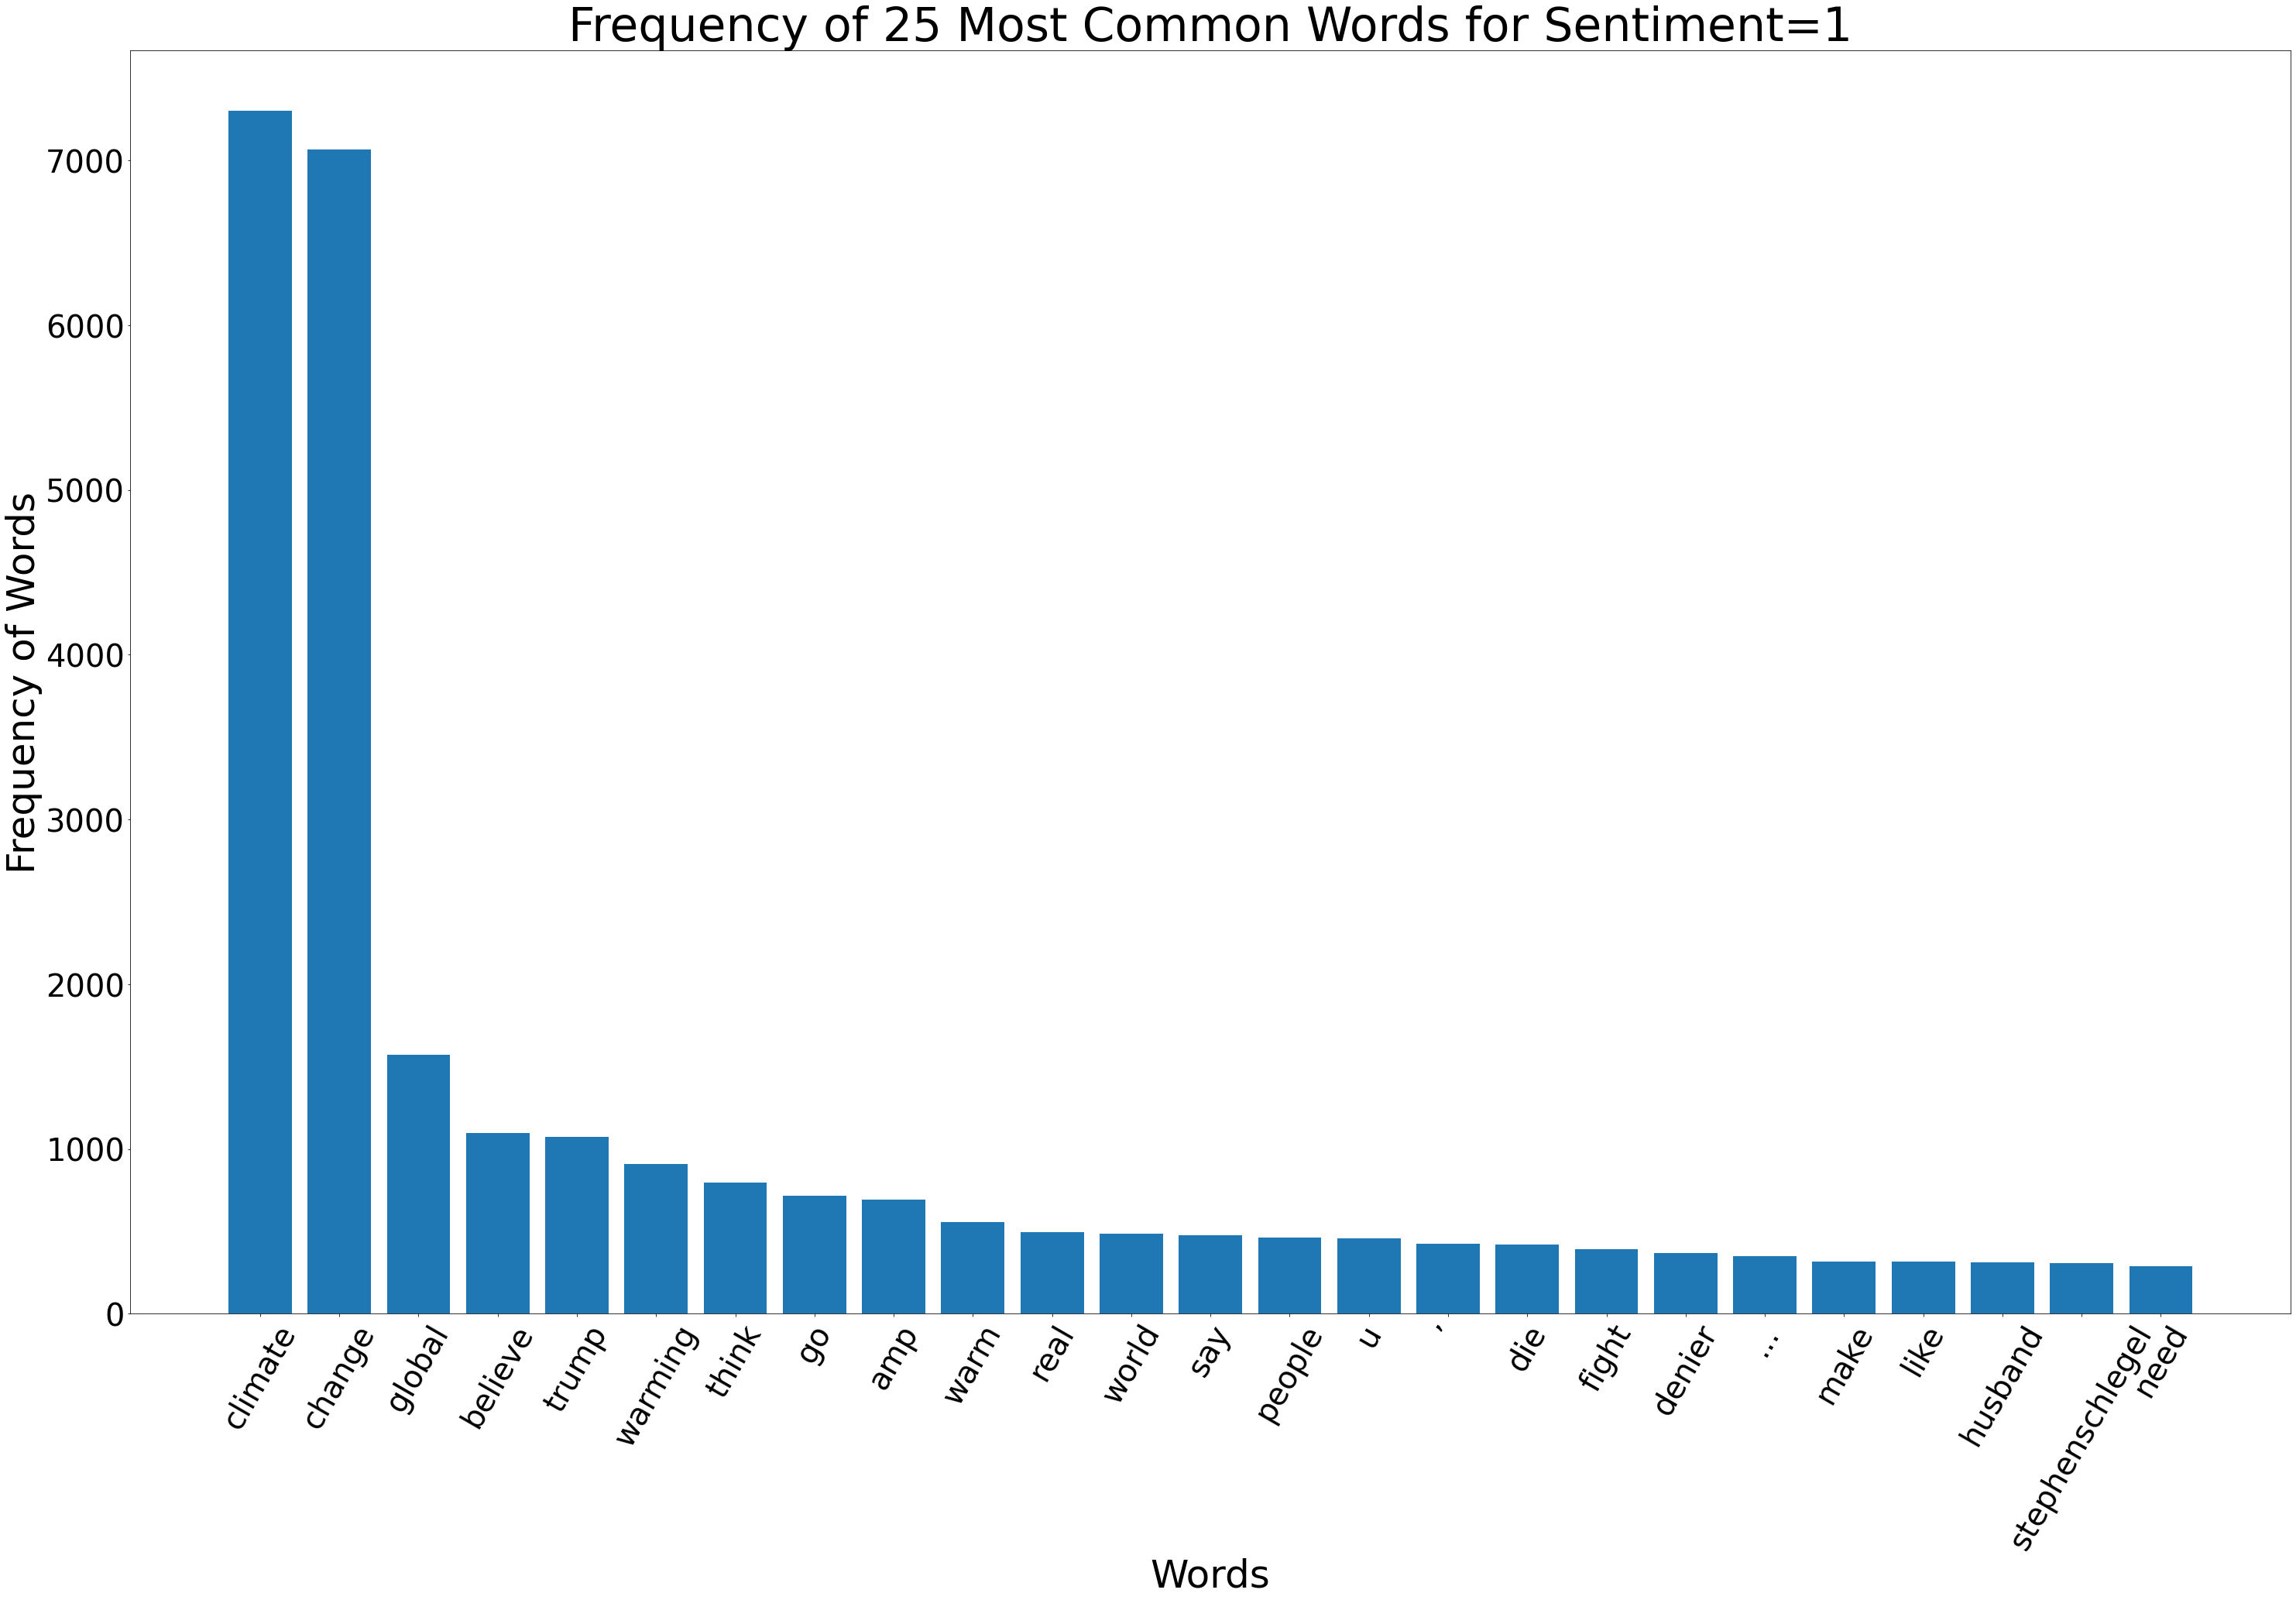

In [45]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Sentiment=1', fontsize=60)
plt.show()

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


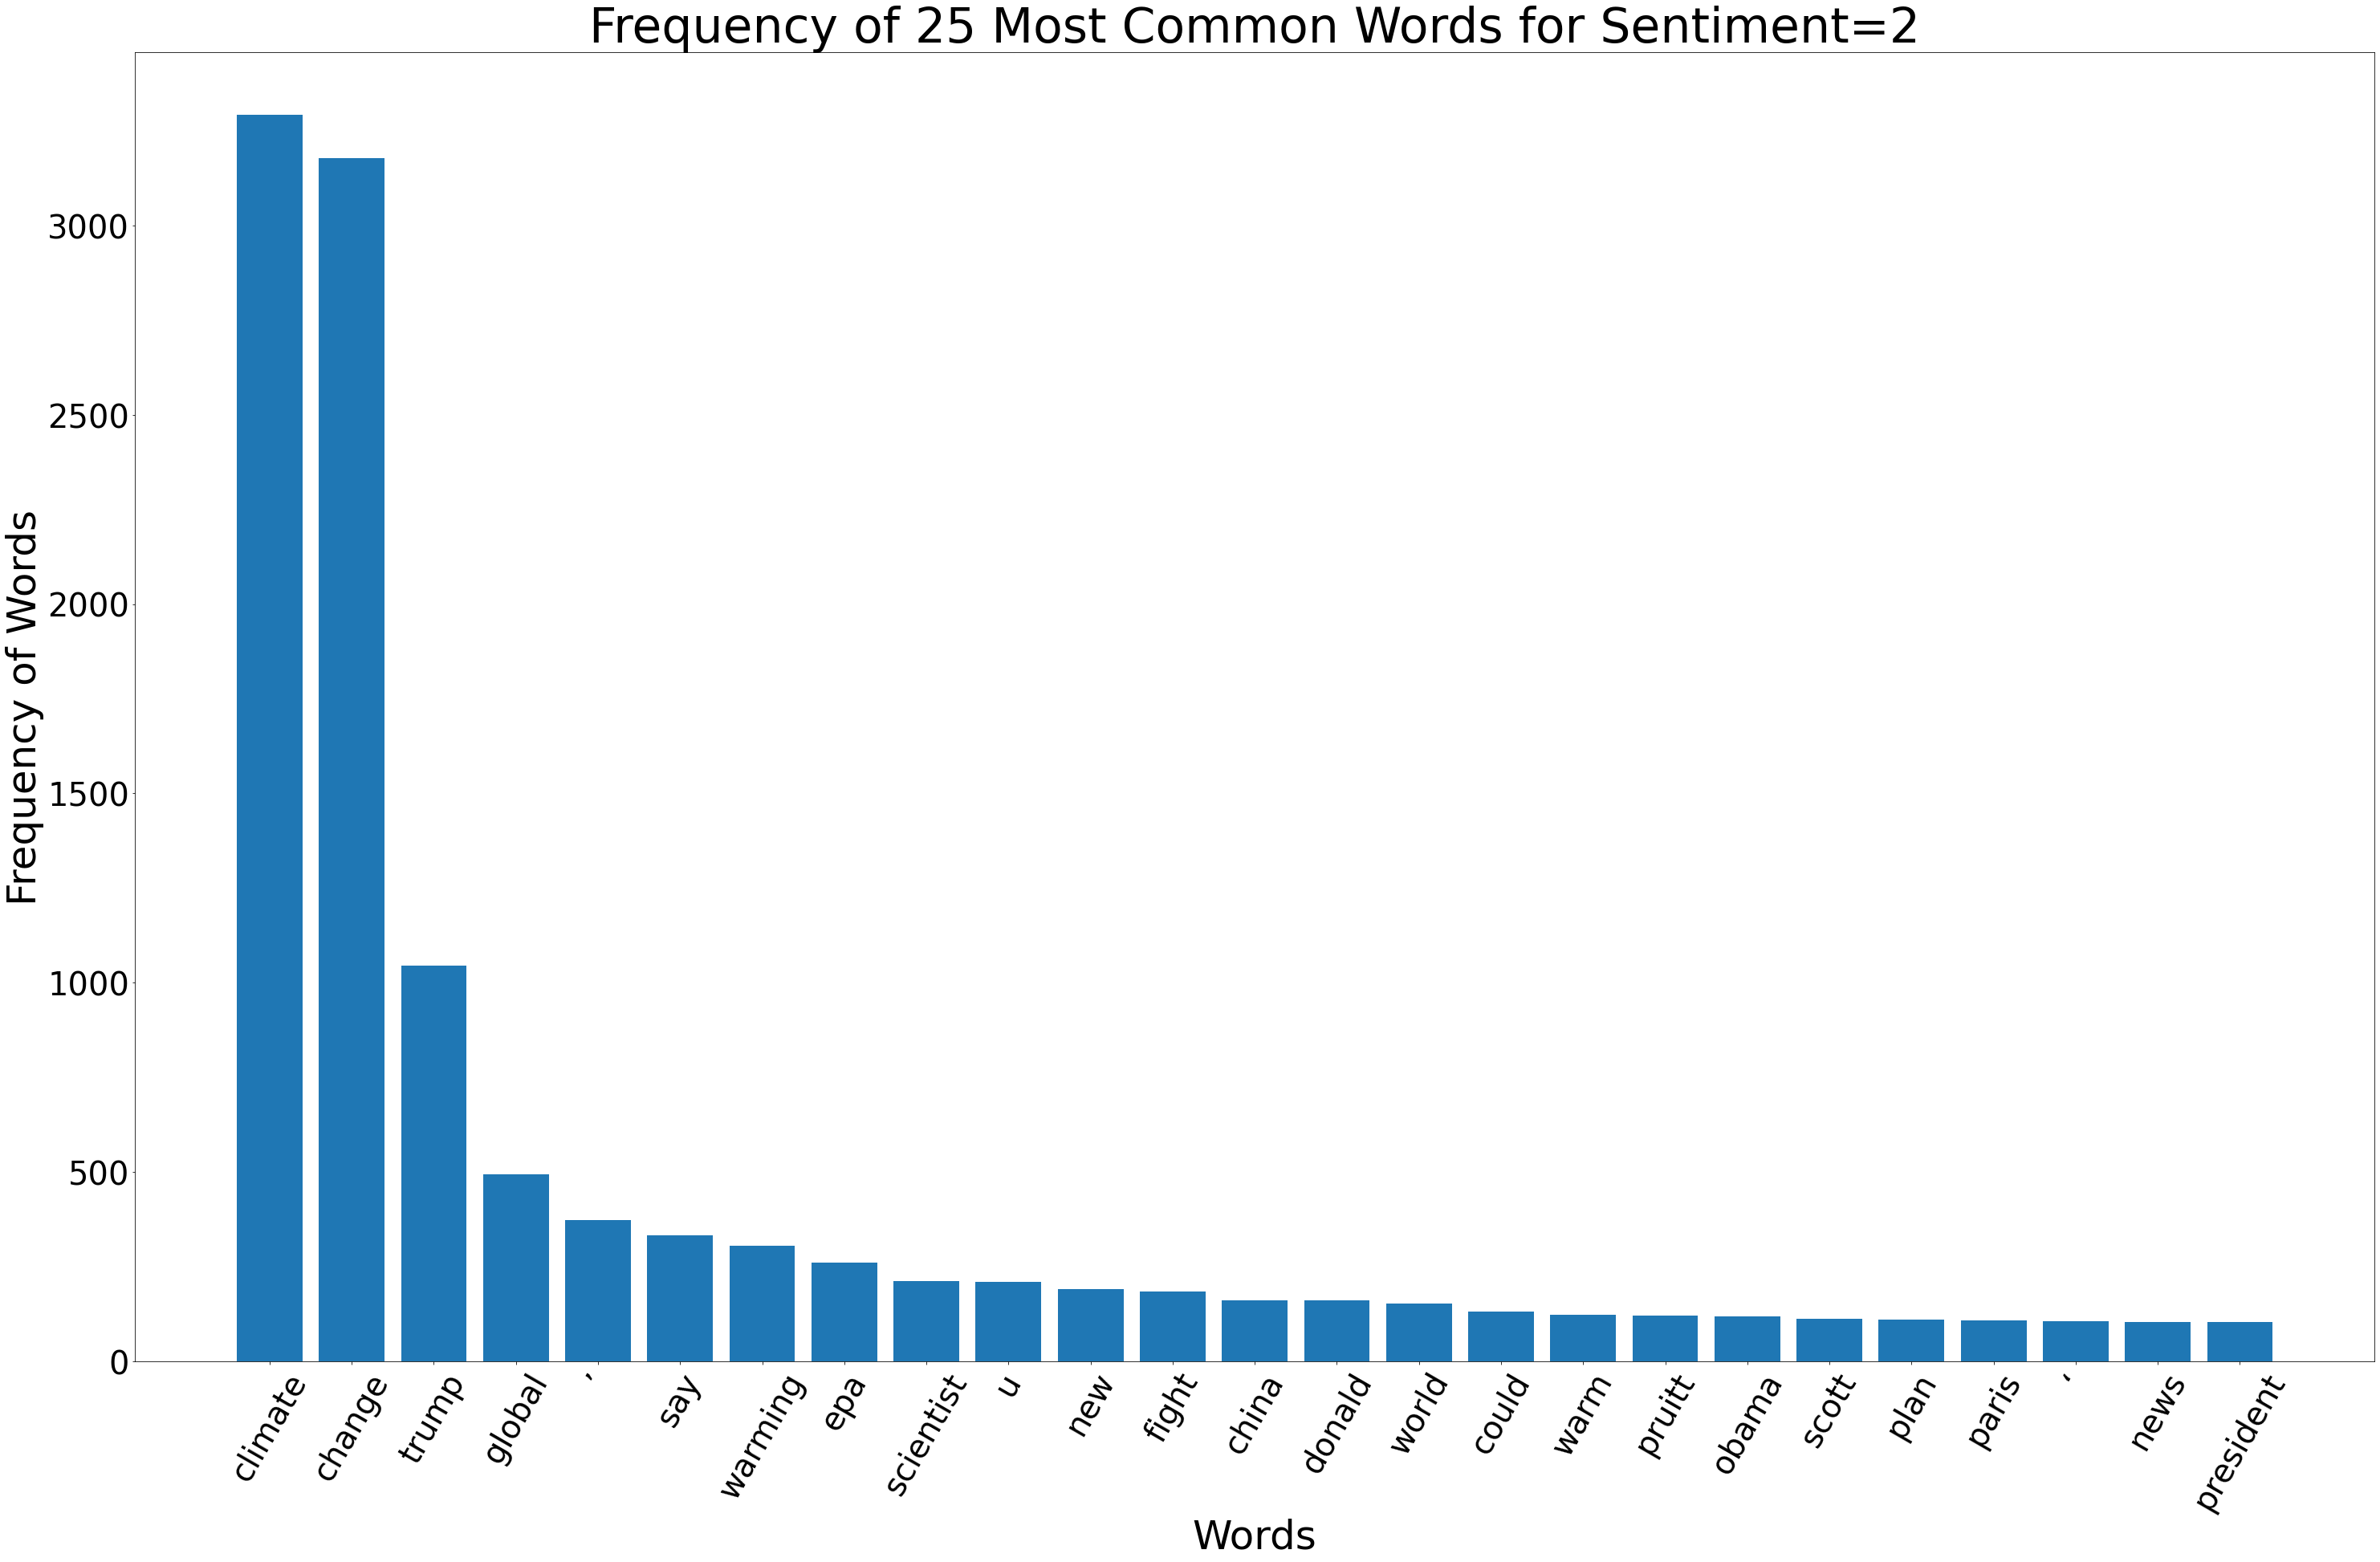

In [46]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Sentiment=2', fontsize=60)
plt.show()

# Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
cv = CountVectorizer()
cv.fit(train_df['lemma'])
X = cv.transform(train_df['lemma'])

y = train_df['sentiment']

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
for c in [1, 1.5, 2, 2.5, 3]:
    
    lr = LogisticRegression(C=c, solver='newton-cg')
    lr.fit(X_train, y_train)
    print('F1_score for C=%s: %s'
         % (c, f1_score(y_test, lr.predict(X_test), average='macro')))

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1_score for C=1: 0.6492718884851876
F1_score for C=1.5: 0.6485103427267722
F1_score for C=2: 0.6460581850794487
F1_score for C=2.5: 0.6473549119951176
F1_score for C=3: 0.6481654654442456


In [51]:
final_model = LogisticRegression(C=1)
final_model.fit(X_train, y_train)
print('Final Model f1_score: %s' %f1_score(y_test, final_model.predict(X_test), average='macro'))

C:\Users\Montgomery\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Final Model f1_score: 0.6506577998358231


C:\Users\Montgomery\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
